In [16]:
%matplotlib inline
import deepdish as dd
import h5py
import numpy as np
from galaxy_analysis.plot.plot_styles import *
import matplotlib.pyplot as plt
from galaxy_analysis.utilities import utilities
from scipy.interpolate import CubicSpline

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

rc('text',usetex=False)
rc('font',size=fsize)


In [2]:
#import importlib
#importlib.reload(utilities)

In [3]:
plot_time_scatter = 75.0

In [4]:
def bytes_to_string(obj):
    """
    Seems some of the string data I've written to file in python 2.x code
    is being read in as bytes now. But sadly I want them to be strings
    May need to do this a lot.....
    """
    if (not isinstance(obj, list)) and (not isinstance(obj,np.ndarray)):
        if isinstance(obj, bytes):
            return obj.decode()
    
    # could put a check in to see if ANY are even bytes in the 
    # first place and just return the original obj.... but lazy...
    ret = [x.decode() if isinstance(x,bytes) else x for x in obj]
    
    if isinstance(obj, np.ndarray):
        return np.array(ret)
    else:
        return ret

    

In [5]:
#run     = 'NSNS1'
#run     = 'HNE1'
#run     = 'AGB1'
run     = 'AGB1'

run2    = 'SNE1'

infile = '/home/aemerick/work/enzo_runs/mixing_experiment/' + run + '/' + run + '_gas_abundances.h5'
infile = '/home/aemerick/work/enzo_runs/mixing_experiment/' + run + '/abundances/gas_abundances.h5'

h5data    = h5py.File(infile,'r')
zbins     = dd.io.load(infile,'/DD0500/CNM/mass_fraction/bins')
data_list = np.sort([x for x in h5data.keys() if 'DD' in x])


infile2 = '/home/aemerick/work/enzo_runs/mixing_experiment/' + run2 + '/' + run2 + '_gas_abundances.h5'
infile2 = '/home/aemerick/work/enzo_runs/mixing_experiment/' + run2 + '/abundances/gas_abundances.h5'

h5data2    = h5py.File(infile2,'r')
data_list2 = np.sort([x for x in h5data2.keys() if 'DD' in x])


In [6]:
run_names = ['AGB1','NSNS1','SNE1','HNE1','HNE2','NSNS3', 'AGB1_400','NSNS1_400','SNE1_400']


h5data_dict    = {}
data_list_dict = {}
infile_dict    = {}

for run in run_names:
#    infile_dict[run] = '/home/aemerick/work/enzo_runs/mixing_experiment/' + run + '/' + run + '_gas_abundances.h5'
    infile_dict[run] = '/home/aemerick/work/enzo_runs/mixing_experiment/' + run + '/abundances/gas_abundances.h5' 
    
    h5data_dict[run] = h5py.File(infile_dict[run],'r')
    data_list_dict[run] = np.sort([x for x in h5data_dict[run].keys() if 'DD' in x])
    
abundances_to_average = {}
abundances_to_average['AGB1']  = ["C",'N','O','Na','Mg','Si','S','Ca','Mn','Fe','Ni','As','Sr','Y','Ba','La','Ce','Pr','Nd']
abundances_to_average['NSNS1'] = ['Na','Si','S','Ca','Mn','Ni','As']
abundances_to_average['SNE1']  = ['Na','Si','S','Ca','Mn','Ni','As']
abundances_to_average['HNE1']  = ['Na']
abundances_to_average['HNE2']  = ['Na']

abundances_to_average['NSNS2'] = abundances_to_average['NSNS1']
abundances_to_average['NSNS3'] = abundances_to_average['NSNS1']

abundances_to_average['AGB1_400'] = abundances_to_average['AGB1']
abundances_to_average['SNE1_400'] = abundances_to_average['SNE1']
abundances_to_average['NSNS1_400'] = abundances_to_average['NSNS1']

data_list = data_list_dict['AGB1']
infile = infile_dict['AGB1']
h5data = h5data_dict['AGB1']
zbins     = dd.io.load(infile,'/DD0500/CNM/mass_fraction/bins')


In [7]:
run_label_dict = {"AGB1":"A_E46", "NSNS1" :"A_E49", "NSNS3" : "A_E50", "SNE1" : "A_E51", "HNE1":"A_E52",
                  "AGB1_400" : "B_E46", "NSNS1_400" : "B_E49", "SNE1_400" : "B_E51",
                  "AGB1_151" : "151_E46", "NSNS1_151" : "151_E50", "SNE1_151" : "151_E51",
                  "HNE2" : "I_E52_r300"}

cmap = magma
nmax = 5.0
run_color_dict = {'AGB1': cmap(0.0), 'NSNS1' : cmap(1.0/nmax), 'NSNS3' : cmap(2.0/nmax),
                   'SNE1' : cmap(3.0/nmax), 'HNE1' : cmap(4.0/nmax)}
run_lines = {'AGB1' : '-', 'NSNS1' : '--', 'NSNS3' : '-.', 'SNE1' : (0,(3,1,1,1,1,1)) , 'HNE1' : ':'}
rc('text',usetex=False)
rc('font',size=fsize)

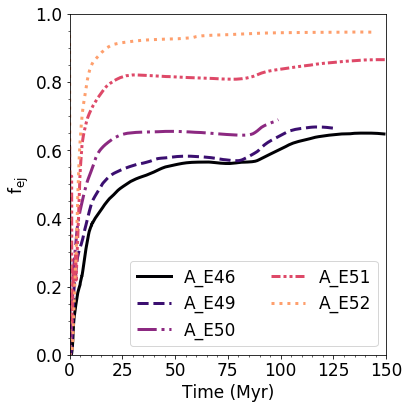

In [24]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(6,6)
for run in ['AGB1','NSNS1','NSNS3','SNE1','HNE1']:
    data = np.genfromtxt('/home/aemerick/work/enzo_runs/mixing_experiment/' + run +\
                         '/average_enrichment_evolution.dat', names = True)    

    ax.plot( data['time']-data['time'][0],
             data['CGM'] / (data['Disk'] + data['CGM']), label = run_label_dict[run],
             lw = 3, color = run_color_dict[run], ls = run_lines[run]) 
ax.set_xlim(0.0,150.0)
ax.set_ylim(0.0,1.0)
ax.set_xlabel(r'Time (Myr)')
ax.set_ylabel(r'f$_{\rm ej}$')
ax.legend(loc='best',ncol=2)
plt.minorticks_on()
plt.tight_layout()
fig.savefig('paper_CGM_average_evolution.png')

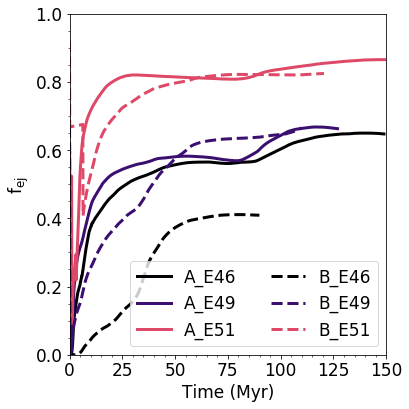

In [41]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(6,6)
for run in ['AGB1','NSNS1','SNE1']:
    data = np.genfromtxt('/home/aemerick/work/enzo_runs/mixing_experiment/' + run +\
                         '/average_enrichment_evolution.dat', names = True)    

    ax.plot( data['time']-data['time'][0],
             data['CGM'] / (data['Disk'] + data['CGM']), label = run_label_dict[run],
             lw = 3, color = run_color_dict[run], ls ='-') 
    
for run in ['AGB1_400','NSNS1_400','SNE1_400']:
    data = np.genfromtxt('/home/aemerick/work/enzo_runs/mixing_experiment/' + run +\
                         '/average_enrichment_evolution.dat', names = True)    

    ax.plot( data['time']-data['time'][0],
             data['CGM'] / (data['Disk'] + data['CGM']), label = run_label_dict[run],
             lw = 3, color = run_color_dict[run.split('_')[0]], ls ='--') 
    
ax.set_xlim(0.0,150.0)
ax.set_ylim(0.0,1.0)
ax.set_xlabel(r'Time (Myr)')
ax.set_ylabel(r'f$_{\rm ej}$')
ax.legend(loc='best',ncol=2)
plt.minorticks_on()
plt.tight_layout()
fig.savefig('combined_CGM_average_evolution.png')

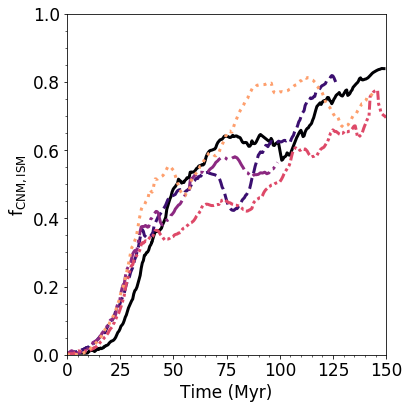

In [30]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(6,6)
for run in ['AGB1','NSNS1','NSNS3','SNE1','HNE1']:
    data = np.genfromtxt('/home/aemerick/work/enzo_runs/mixing_experiment/' + run +\
                         '/average_enrichment_evolution.dat', names = True)    

    x = data['time'] - data['time'][0]
    y = data['CNM'] / data['Disk']
    
    y[:np.argmin(y)] = np.min(y) # fix the first few timesteps where things are weird due to offset of injection time and sim time
    
    ax.plot( x, y,
             label = run_label_dict[run],
             lw = 3, color = run_color_dict[run], ls = run_lines[run]) 
ax.set_xlim(0.0,150.0)
ax.set_ylim(0.0,1.0)
ax.set_xlabel(r'Time (Myr)')
ax.set_ylabel(r'f$_{\rm CNM,ISM}$')
#ax.legend(loc='best',ncol=2)
plt.minorticks_on()
plt.tight_layout()
fig.savefig('paper_CNM_average_evolution.png')

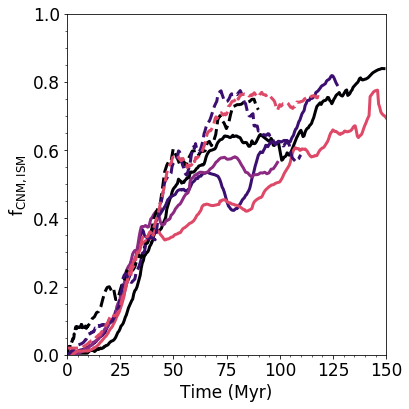

In [40]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(6,6)
for run in ['AGB1','NSNS1','NSNS3','SNE1']:
    data = np.genfromtxt('/home/aemerick/work/enzo_runs/mixing_experiment/' + run +\
                         '/average_enrichment_evolution.dat', names = True)    

    x = data['time'] - data['time'][0]
    y = data['CNM'] / data['Disk']
    
    y[:np.argmin(y)] = np.min(y) # fix the first few timesteps where things are weird due to offset of injection time and sim time
    
    ax.plot( x, y,
             label = run_label_dict[run],
             lw = 3, color = run_color_dict[run], ls = '-')

for run in ['AGB1_400','NSNS1_400','SNE1_400']:
    data = np.genfromtxt('/home/aemerick/work/enzo_runs/mixing_experiment/' + run +\
                         '/average_enrichment_evolution.dat', names = True)    

    x = data['time'] - data['time'][0]
    y = data['CNM'] / data['Disk']
    
    y[:np.argmin(y)] = np.min(y) # fix the first few timesteps where things are weird due to offset of injection time and sim time
    
    ax.plot( x, y,
             label = run_label_dict[run],
             lw = 3, color = run_color_dict[run.split('_')[0]], ls = '--')
    
ax.set_xlim(0.0,150.0)
ax.set_ylim(0.0,1.0)
ax.set_xlabel(r'Time (Myr)')
ax.set_ylabel(r'f$_{\rm CNM,ISM}$')
#ax.legend(loc='best',ncol=2)
plt.minorticks_on()
plt.tight_layout()
fig.savefig('combined_CNM_average_evolution.png')

In [8]:
def _old_get_mass_fraction(zdex=None, mf = None, data_names = data_list, fname = infile,
                           SN_element = 'O', AGB_element = 'Ba', bins = zbins,
                           norm_stat = 'median'):
    
    result = {'AGB' : np.zeros(np.size(data_names)),
              'SN'  : np.zeros(np.size(data_names)),
              'time' : np.zeros(np.size(data_names))}
    
    log_z  = np.log10( 0.5 * (bins[1:] + bins[:-1]))
    
    for i,d in enumerate(data_names):
        #
        # load mass fraction
        # 
        dname = str(d)
        SN  = dd.io.load(fname, '/' + dname + '/CNM/mass_fraction/' + SN_element + '_Fraction')
        AGB = dd.io.load(fname, '/' + dname + '/CNM/mass_fraction/' + AGB_element + '_Fraction')
        
        # np.interp(mf, np.cumsum(SN['hist']), log_z - SN['median'])
        
        if (norm_stat is None) or (norm_stat == ""):
            SN_norm  = np.zeros(np.size(log_z))
            AGB_norm = np.zeros(np.size(log_z))
        else:
            SN_norm   = np.log10(SN[norm_stat])
            AGB_norm  = np.log10(AGB[norm_stat])
        
        # find the 1 dex limit
        if (not (zdex is None)):
            result['SN'][i]= 1.0 - np.interp(zdex, log_z - SN_norm, np.cumsum(SN['hist']))
            result['AGB'][i]= 1.0 - np.interp(zdex, log_z - AGB_norm, np.cumsum(AGB['hist']))
            
        else:
            result['SN'][i]  = np.interp(1.0-mf, np.cumsum( SN['hist']), log_z -  SN_norm)
            result['AGB'][i] = np.interp(1.0-mf, np.cumsum(AGB['hist']), log_z - AGB_norm)
            
        result['time'][i] = dd.io.load(fname, '/'+dname+'/general/Time')
        
        # slightly better will be to just track the time evolution of 0.10 and 0.9
        # mass fractions (how far from mediam)
        
    result['time'] = result['time'] - result['time'][0]
    
    return result


def get_mass_fraction(zdex=None, mf = None, data_names = data_list, fname = infile,
                          bins = zbins, elements = None,
                          norm_stat = 'median', phase = 'CNM'):
    
    
    if elements is None:
        elements = dd.io.load(fname, '/metal_species')
    elif isinstance(elements, basestring):
        elements = [elements]
    
    result = {}
    for e in elements:
        result[e] = np.zeros(np.size(data_names))
        
    result['time'] = np.zeros(np.size(data_names))
    
    log_z  = np.log10( 0.5 * (bins[1:] + bins[:-1]))
    
    for i,d in enumerate(data_names):
        #
        # load mass fraction
        # 
        dname = str(d)
        for e in elements:
            mass_data  = dd.io.load(fname, '/' + dname + '/' + phase + '/mass_fraction/' + e + '_Fraction')
        
            # np.interp(mf, np.cumsum(SN['hist']), log_z - SN['median'])
        
            if (norm_stat is None) or (norm_stat == ""):
                norm  = np.zeros(np.size(log_z))
            else:
                norm   = np.log10(mass_data[norm_stat])
        
            # find the 1 dex limit
            if (not (zdex is None)):
                result[e][i]= 1.0 - np.interp(zdex, log_z - SN_norm, np.cumsum(mass_data['hist']))
            
            else:
                result[e][i]  = np.interp(1.0-mf, np.cumsum( mass_data['hist']), log_z -  norm)
            
        result['time'][i] = dd.io.load(fname, '/'+dname+'/general/Time')
        
        # slightly better will be to just track the time evolution of 0.10 and 0.9
        # mass fractions (how far from mediam)
        
    result['time'] = result['time'] - result['time'][0]
    
    return result




def get_stat(statname, data_names = data_list, fname = infile,
             bins = zbins, elements = None, logval = False, average_all= False, average_type = None, phase = 'CNM'):
    
    
    if elements is None:
        elements = dd.io.load(fname, '/metal_species')
        
    elif isinstance(elements, basestring):
        elements = [elements]

    elements = bytes_to_string(elements)        
  
    result = {}
    for e in elements:
        
        if statname != 'hist':
            result[e] = np.zeros(np.size(data_names))
        else:
            result[e] = [None]*np.size(data_names)    
            
    if statname != 'hist':
        result['combined'] = np.zeros(np.size(data_names))
    else:
        result['combined'] = [None]*np.size(data_names)   
        
        
    result['time'] = np.zeros(np.size(data_names))
    
    log_z  = np.log10( 0.5 * (bins[1:] + bins[:-1]))
    
    
    for i,d in enumerate(data_names):
        #
        # load mass fraction
        # 
        dname = str(d)
        for e in elements:
            
            #try:
            #e = str(e)
           # print( dname, phase, e)
            mass_data  = dd.io.load(fname, '/' + dname + '/' + phase + '/mass_fraction/' + e + '_Fraction')
            #except:
            #    print("Failing for " + dname, e)
            #    continue
        
            # np.interp(mf, np.cumsum(SN['hist']), log_z - SN['median'])
        
            # find the 1 dex limit
            
            result[e][i] = mass_data[statname]
            
        try:
            mass_data = dd.io.load(fname, '/' + dname + '/' + phase + '/mass_fraction/combined')
            result['combined'][i] = mass_data[statname]
        except:
            if statname != 'hist':
                result['combined'][i] = 9999999
            else:
                result['combined'][i] = np.ones(np.size(zbins))*9999999
        

        
        result['time'][i] = dd.io.load(fname, '/'+dname+'/general/Time')
        
        # slightly better will be to just track the time evolution of 0.10 and 0.9
        # mass fractions (how far from mediam)

    if logval:
        for e in elements:
            result[e] = np.log10(result[e])
        result['combined'] = np.log10(result['combined'])
        
    result['time'] = result['time'] - result['time'][0]
    
    if average_all:
        if statname != 'hist':
            result['average'] = np.zeros(np.size(result['time']))
        else:
            
            result['average'] = np.zeros(np.shape(result[e]))
           
        count = 0
        for k in result.keys():
            
            if average_type is None:
                if k == 'time' or k =='average' or k =='combined' or np.isnan(result[k][0]):
                    continue
            else:
                if not (k in abundances_to_average[average_type]):
                    continue
                if k == 'combined':
                    continue
                    
            if statname == 'hist':
                #temp = result[k]*1.0
                #temp[ np.isinf(temp) ] = 0.0
                
                temp = 10.0**(result[k])            
                #
                # some of the mass might be below the -20 bin threshold in the histogram...
                # I need to account for this in averaging in order for the averaged
                # histogram to have the same CDF / PDF properties
                #
                #tempsum = np.cumsum(temp,axis=1)
                #temp = (temp.transpose() + (1.0 - tempsum[:,-1])).transpose()

                temp[:,0] = temp[:,0] + (1.0 - np.cumsum(temp,axis=1)[:,-1])
                result['average'] = result['average'] + temp  
            
            #elif (statname == 'mean' or statname == 'median'):
            #    result['average'] = result['average'] + 10.0**(result[k])
                # take log of average, not average of log!!!
            else:
                
                result['average'] = result['average'] + result[k]
            count = count + 1
            
        result['average'] = result['average']/(1.0 * count)
        if statname == 'hist':# or statname == 'median' or statname == 'mean':
        #    result['average'][result['average']==0.0] = -np.inf
            result['average'] = np.log10(result['average'])
            result['average'][ np.isnan(result['average']) ] = -np.inf # check this
                
    
    return result

def list_stats(data_name, fname = infile):
    
    if not (isinstance(data_name,basestring)):
        if isinstance(data_name[0],basestring):
            dname = data_name[0]
        else:
            raise ValueError
    else:
        dname = data_name
        
    return (dd.io.load(fname, '/' + str(dname) +'/CNM/mass_fraction/O_Fraction')).keys()    
    

In [10]:

tempdat = np.array([all_data['CNM']['AGB1']['mean'][x] for x in all_data['CNM']['AGB1']['mean'].keys() if not (x in ['time','average'])])


mean_median = np.median(tempdat, axis = 0)
mean_average = all_data['CNM']['AGB1']['mean']['average']
time    = all_data['CNM']['AGB1']['mean']['time']

tempdat2 = np.array([all_data['CNM']['AGB1']['median'][x] for x in all_data['CNM']['AGB1']['median'].keys() if not (x in ['time','average'])])
median_median = np.median(tempdat2, axis = 0)
median_average = all_data['CNM']['AGB1']['median']['average']



plt.plot(time, -1.0*(median_average - mean_average), lw = 3, ls = '-', color = 'black')
plt.plot(time, -1.0*(median_median  - mean_median),  lw  =3, ls = '--', color = 'black')

NameError: name 'all_data' is not defined

In [9]:
def _get_plot_values(phase, run, stat, species = 'average'):
    
    
    
    if stat in all_data[phase][run].keys():
        y = all_data[phase][run][stat][species]
    elif stat == 'mean-median':
        y = all_data[phase][run]['mean'][species] - all_data[phase][run]['median'][species]
    elif stat == 'max-min':
        y = all_data[phase][run]['max'][species] - all_data[phase][run]['min'][species]
    elif stat == 'IQR':
        y = all_data[phase][run]['Q3'][species] - all_data[phase][run]['Q1'][species]
    elif stat == 'IDR':
        y = all_data[phase][run]['decile_9'][species] - all_data[phase][run]['decile_1'][species]
    else:
        raise ValueError
    
    time = all_data[phase][run]['mean']['time']
    
    return time, y

In [10]:
test= [b'C', b'N', b'O', b'Na', b'Mg', b'Si', b'S', b'Ca', b'Mn', b'Fe', b'Ni', b'As', b'Sr', b'Y', b'Ba', b'La', b'Ce', b'Pr', b'Nd']

In [10]:
all_data = {}

phases = ["CNM"]#,"Disk"]#,"WIM"]# ,"GravBound","FullBox","OutsideBox"] #['Disk','CNM','WNM','WIM','HIM','halo']

#phases = ['CNM']

for phase in phases:
    all_data[phase] = {}
    
    print(phase)
  #  ['AGB1','SNE1','NSNS1','NSNS3','HNE1']:
    for run in  run_names + ["NSNS3","NSNS1_400","SNE1_400",'HNE2']:
        
        #if phase == "combined":
        #    if (not (run == "AGB1") or (run=="SNE1")):
        #        continue
        
        all_data[phase][run] = {}
        for stat in ["mean","median","hist","Q1","Q3"]: #['mean','median','Q1','Q3','decile_9','decile_1','min','max']:
            all_data[phase][run][stat] = get_stat(stat, logval = True, 
                                           average_all = True, average_type = run,
                                           data_names  = data_list_dict[run], 
                                           fname = infile_dict[run], phase = phase)
            
            
        # need to re-measure median:
        #
        for i in np.arange(np.size(all_data[phase][run]['median']['average'])):
            hist     = 10.0**(all_data[phase][run]['hist']['average'][i])
           # print(np.cumsum(hist)[0],np.cumsum(hist)[-1])
            sumhist  = np.cumsum(hist)
            
            sumhist = sumhist + (1.0-sumhist[-1])
            
            #print(np.shape(sumhist), np.shape(zbins))
            if sumhist[0] > 0.5:
                new_med = np.log10(zbins[0])
            else:
                new_med = np.interp(0.5, sumhist, np.log10(zbins[:-1]))
            all_data[phase][run]['median']['average'][i] = new_med
            
            #print(np.shape(sumhist), np.shape(zbins))
            if sumhist[0] > 0.25:
                new_q1 = np.log10(zbins[0])
            else:
                new_q1 = np.interp(0.25, sumhist, np.log10(zbins[:-1]))
            all_data[phase][run]['Q1']['average'][i] = new_q1
            
            #print(np.shape(sumhist), np.shape(zbins))
            if sumhist[0] > 0.75:
                new_q3 = np.log10(zbins[0])
            else:
                new_q3 = np.interp(0.75, sumhist, np.log10(zbins[:-1]))
            all_data[phase][run]['Q3']['average'][i] = new_q3           
           # print(new_med)
            
        all_data[phase][run]['rms'] = {}          
        all_data[phase][run]['enriched_fraction'] = {}
        for k in all_data[phase][run]['median'].keys():
            
            if k == 'time':
                continue 
                
            all_data[phase][run]['rms'][k] = np.zeros(np.shape( all_data[phase][run]['median'][k] ))
            all_data[phase][run]['enriched_fraction'][k] = np.zeros(np.shape( all_data[phase][run]['median'][k] ))
            
            for i in np.arange(np.size(all_data[phase][run]['median'][k])):
                hist     = 10.0**(all_data[phase][run]['hist'][k][i])            
                #
                # As recommended by referee, compute the rms deviation for "enriched"
                # gas using a somewhat arbitrary cutoff of gas factor of 10^{x} away from mean
                #
                cutval = 5
                temphist = np.log10(hist)
                mean = all_data[phase][run]['mean'][k][i]
                dz = 1.0
                
                # frankly not sure why this sometimes is needed.... but
                # only happens in the combined case, which I do not need to examine ever
                if k == 'combined' and np.size(temphist) == np.size(zbins):
                    select = np.log10(zbins)<(mean-cutval)
                    X = zbins
                    
                else:
                    select = np.log10(zbins[:-1]) < (mean - cutval)
                    X = 0.5*(zbins[1:] + zbins[:-1])
                    
                #print(k,np.shape(zbins),np.shape(temphist))
                temphist[select] = -np.inf    
                W = 1.0 * 10**(temphist)/ (1.0*np.sum(10.0**(temphist))) /dz
                # X = np.log10(1.0 * zbins[:-1])    
                #  all_data[] = np.log10(np.sum(X*W) / np.sum(W))
        
                # np.matmul(X,np.transpose(W)) / np.sum(W)
                # N = 1.0*np.size(W)
                N = 2.0
                #print(np.sqrt(N-1))
                all_data[phase][run]['rms'][k][i]  = np.sqrt( ( np.sum(W*(np.log10(X)-mean)**2))/(np.sum(W))/((N-1)))        
        
                val = 10.0**(temphist[np.logical_not(select)])
                if np.size(val) > 0:
                    all_data[phase][run]['enriched_fraction'][k][i] = np.cumsum(val)[-1]
                else:
                    all_data[phase][run]['enriched_fraction'][k][i] = 0.0
            

CNM


/home/aemerick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:169: RuntimeWarning: divide by zero encountered in log10
/home/aemerick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:170: RuntimeWarning: divide by zero encountered in log10
/home/aemerick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:220: RuntimeWarning: divide by zero encountered in log10
/home/aemerick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in log10
/home/aemerick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:90: RuntimeWarning: invalid value encountered in true_divide
/home/aemerick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:220: RuntimeWarning: invalid value encountered in log10


In [12]:
np.shape(all_data['CNM']['NSNS1']['hist']['average'])

(208, 400)

In [11]:
event_data = {}
for run in run_names + ['HNE2','NSNS3','AGB1_400','NSNS1_400','SNE1_400']:
#    event_data[run] = np.genfromtxt('/home/aemerick/work/enzo_runs/mixing_experiment/' +\
#                                    run + '_event_data_table.dat', names = True, dtype=None)
    event_data[run] = np.genfromtxt('/home/aemerick/work/enzo_runs/mixing_experiment/'+run+'/event_data_table.dat', 
                                    #+\
                                    #run + '_event_data_table.dat', 
                                    names = True, dtype=None)

/home/aemerick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  


## NOTE: 

My analysis scripts define the ISM disk radius as r = 600 pc at the moment. This really screws with the enrichment events that occur at r = 600 pc... need to be care ful in analysis (as of 3/29)

In [86]:
event_data['SNE1']['E51']

array([1., 1., 1., 1., 1., 1., 1.])

/home/aemerick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: RuntimeWarning: divide by zero encountered in log10


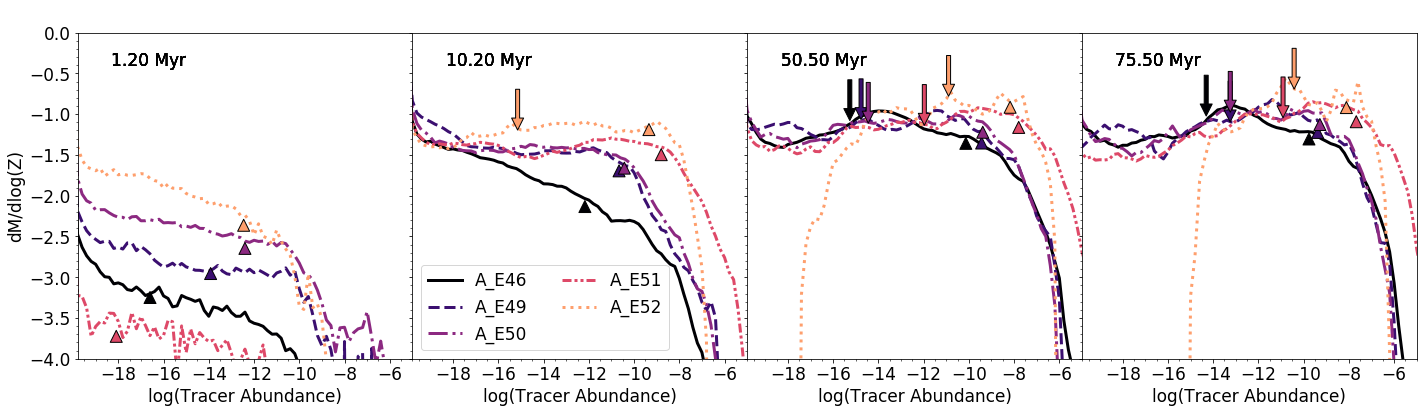

In [32]:
#
# ty and plot a PDF or two
# 
flip = False

rc('text',usetex=False)
rc('font',size=fsize)

dimage = 6

if flip:
    fig,ax = plt.subplots(4,1, sharex=True)
    fig.set_size_inches(1*dimage+2,4*dimage)
    plt.subplots_adjust(hspace=0)
else:
    fig,ax = plt.subplots(1,4, sharey=True)
    fig.set_size_inches(4*dimage,1*dimage)
    plt.subplots_adjust(wspace=0)



def plotable_hist(x):
    x2      = np.ones(np.size(x)+1)
    x2[:-1] = x
    x2[-1]  = x[-2]
    return x2
    
    
center = 'mean'
center = None
plot_mean_median = True
lines = {'AGB1' : '-', 'NSNS1' : '--', 'NSNS3' : '-.', 'SNE1' : (0,(3,1,1,1,1,1)) , 'HNE1' : ':'}


    
e = 'average'

plot_times =  [1.2, 10.2, 50.5, 75.5]




for i,time in enumerate(plot_times):
    
    if flip:
        ax[i].set_ylabel(r'dM/dlog(Z)')
    else:
        ax[i].set_xlabel('log(Tracer Abundance)')
    #ax[i].set_ylabel('PDF')
    if center == 'mean':
        ax[i].set_xlim(-10,5)
    elif center == 'median':
        ax[i].set_xlim(-8,8)
    else:
        ax[i].set_xlim(-19.8,-5)
        
        
    if flip:
        ax[i].set_ylim(-4.1,0.01)
    else:
        ax[i].set_ylim(-4,0)
    
if flip:
    ax[0].set_xlabel('log(Tracer Abundance)')
else:
    ax[0].set_ylabel(r'dM/dlog(Z)')

dz = np.log10(zbins[1:])-np.log10(zbins[:-1])
#dz = 1.0

phase = 'CNM'


ci = 0
for run in ['AGB1','NSNS1','NSNS3','SNE1','HNE1']:
    color = run_color_dict[run]
    
    


    for i,time in enumerate(plot_times):
        
        
    
        agb_hist = all_data[phase][run]['hist']
        median = all_data[phase][run]['median']
        mean   = all_data[phase][run]['mean']
        times    = all_data[phase][run]['hist']['time']
        index = int(np.argmin( np.abs(times - time) ))


        

        
        
        if center == 'median':
            shift = median[e][index]
        elif center == 'mean':
            shift = mean[e][index]
        else:
            shift = 0.0
    
        ploty = np.log10(plotable_hist(10.0**(agb_hist[e][index])/(dz)))

        # now do some re-binning to pretty it up
        _zbins = zbins * 1.0
        _zbins = list(zbins) +[10.0**(np.log10(zbins[-1]) + np.log10(zbins[-1]) - np.log10(zbins[-2]))]   
        _zbins, ploty = utilities.simple_rebin(np.log10(_zbins), ploty, 0.2, # new dbin
                                                  method = 'average')
        _zbins = 10.0**(_zbins[:-1])   
        
        #ax[i].step(np.log10(_zbins) - shift,
        #            ploty,
        #            where='post', lw = 3,
        #            color = color, label = run_label_dict[run]) #label = '%0.2f Myr'%times[index],
        
        _xvals = np.log10(_zbins) - shift
        _yvals = ploty * 1.0
        _yvals[ _yvals < -10 ] = -10
        cs     = CubicSpline(_xvals, _yvals)
        
        xplot  = np.linspace(np.min(_xvals),np.max(_xvals), np.size(_xvals)*10)
        
        ax[i].plot( _xvals, _yvals,
                    #xplot, cs(xplot),
                    lw = 3,
                    color = color, label = run_label_dict[run], ls = lines[run])      
    
        xytext = (0.1,0.9)
        ax[i].annotate("%0.2f Myr"%(time),xy=xytext,xycoords="axes fraction")
        ax[i].set_xticks([-18,-16,-14,-12,-10,-8,-6])#,[-18,'',-14,-12,-10,-8,-6])
        ax[i].xaxis.set_minor_locator(AutoMinorLocator())
#for i,index in enumerate(plot_i):
        if plot_mean_median:
            if center == 'mean':
                ax[i].plot( [median[e][index] - mean[e][index]]*2,   ax[i].get_ylim(), ls = '-', lw = 3, color = color)
                ax[i].plot([0,0],ax[i].get_ylim(),ls='--',lw=2,color='black')
            elif center == 'median':
                ax[i].plot( [mean[e][index] - median[e][index]]*2,   ax[i].get_ylim(), ls = '--', lw = 3, color = color)
                ax[i].plot([0,0],ax[i].get_ylim(),ls='--',lw=2,color='black')
            else:
                xval = median[e][index] -1.0*new_dbin
                
                xy = np.array([xval,   np.interp(median[e][index],np.log10(_zbins)-shift,ploty)])
                xytext = xy + np.array([0.0, 0.5])
                #try:
                if(xytext[1] > ax[i].get_ylim()[0]) and (xytext[0] < ax[i].get_ylim()[1]):
                    ax[i].annotate('', xy=xy,xytext=xytext,arrowprops=dict(facecolor=color))
                #except:
                #    print("line failed") 
                xval = mean[e][index] -1.0*new_dbin
                
                xy = np.array([xval,   np.interp(mean[e][index],np.log10(_zbins)-shift,ploty)])
                xytext = xy  - np.array([0.0, 0.1])
                
                if(xytext[1] > ax[i].get_ylim()[0]) and (xytext[0] < ax[i].get_ylim()[1]):
                    ax[i].annotate('', xy=xy,xytext=xytext,arrowprops=dict(facecolor=color))
                #except:
                #    print("line failed")
                
                #print(xy,xytext)
            
                #ax[i].plot( [median[e][index]]*2,   ax[i].get_ylim(), ls = '-', lw = 3, color = color)
                #ax[i].plot( [mean[e][index]]*2,   ax[i].get_ylim(), ls = '--', lw = 3, color = color)
            
    ci = ci + 1

#print(ploty)
    
    
ax[1].legend(loc='lower left', ncol = 2)

plt.minorticks_on()
#plt.tight_layout()
#print(zbins)

outname = phase + '_PDF_histograms'
if plot_mean_median:
    outname += '_marked'
if center == 'median':
    outname += '_median_norm'
elif center == 'mean':
    outname += '_mean_norm'
outname += '.png'



fig.savefig(outname)

/home/aemerick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: divide by zero encountered in log10


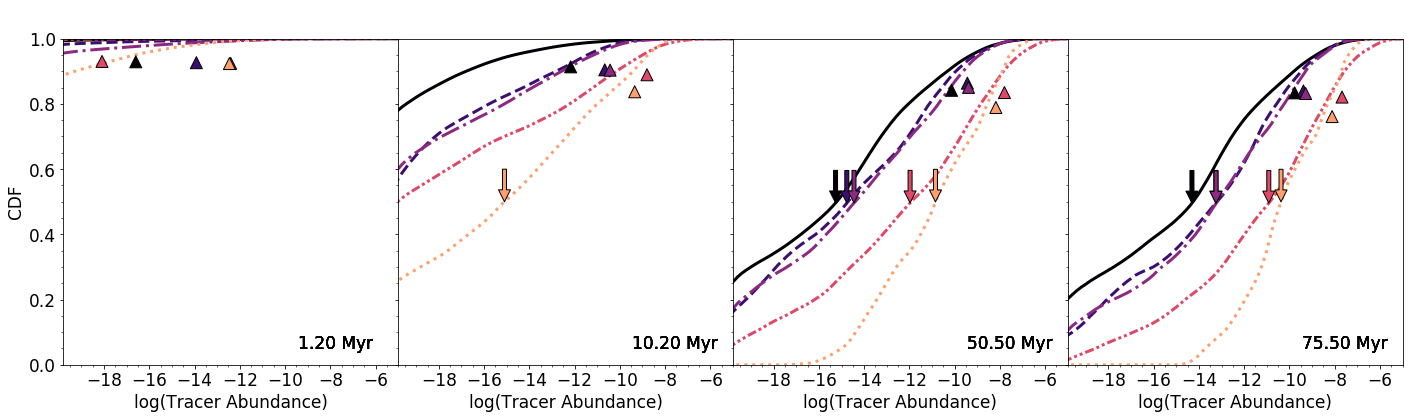

In [31]:
#
# ty and plot a PDF or two
# 
flip = False

rc('text',usetex=False)
rc('font',size=fsize)

dimage = 6

if flip:
    fig,ax = plt.subplots(4,1, sharex=True)
    fig.set_size_inches(1*dimage+2,4*dimage)
    plt.subplots_adjust(hspace=0)
else:
    fig,ax = plt.subplots(1,4, sharey=True)
    fig.set_size_inches(4*dimage,1*dimage)
    plt.subplots_adjust(wspace=0)



def plotable_hist(x):
    x2      = np.ones(np.size(x)+1)
    x2[:-1] = x
    x2[-1]  = x[-2]
    return x2
    
    
center = None
plot_mean_median = True


    
e = 'average'

plot_times =  [1.2, 10.2, 50.5, 75.5]




for i,time in enumerate(plot_times):
    
    if flip:
        ax[i].set_ylabel(r'dM/dlog(Z)')
    else:
        ax[i].set_xlabel('log(Tracer Abundance)')
    #ax[i].set_ylabel('PDF')
    if center == 'mean':
        ax[i].set_xlim(-10,5)
    elif center == 'median':
        ax[i].set_xlim(-8,8)
    else:
        ax[i].set_xlim(-19.8,-5)
        
      
    if flip:
        ax[i].set_ylim(-4.1,0.01)
    else:
        ax[i].set_ylim(0,1)
    
if flip:
    ax[0].set_xlabel('log(Tracer Abundance)')
else:
    ax[0].set_ylabel(r'CDF')

dz = np.log10(zbins[1:])-np.log10(zbins[:-1])
#dz = 1.0

phase = 'CNM'

rebin = True
CDF   = True
dz    = 1.0   # if == 1, plots mass fraction in each bin (i.e. CDF = cumsum(plot_y))
new_dbin = 0.2

ci = 0
for run in ['AGB1','NSNS1','NSNS3','SNE1','HNE1']:
    color = run_color_dict[run]
    
    e = 'average'
    if run == 'HNE1':
        e = 'Na'

    for i,time in enumerate(plot_times):
        
        
    
        agb_hist = all_data[phase][run]['hist']
        median = all_data[phase][run]['median']
        mean   = all_data[phase][run]['mean']
        times    = all_data[phase][run]['hist']['time']
        index = int(np.argmin( np.abs(times - time) ))
        
        #print(index)
        if center == 'median':
            shift = median[e][index]
        elif center == 'mean':
            shift = mean[e][index]
        else:
            shift = 0.0
    
        ploty = np.log10(plotable_hist(10.0**(agb_hist[e][index])/(dz)))

        # now do some re-binning to pretty it up
        _zbins = zbins * 1.0
        
        if rebin:
            _zbins = list(zbins) +[10.0**(np.log10(zbins[-1]) + np.log10(zbins[-1]) - np.log10(zbins[-2]))]   
            _zbins, ploty = utilities.simple_rebin(np.log10(_zbins), 10.0**(ploty), new_dbin, # new dbin
                                                  method = 'sum')
            _zbins = 10.0**(_zbins[:-1])   
            ploty =np.cumsum(ploty) #+ #(1.0 - ploty[-1])

            #ploty = ploty/ ploty[-1]
            ploty = ploty + (1.0 - ploty[-1])
            
            #medy = np.interp(median[e][index],np.log10(_zbins)-shift,ploty)    
            
            #ploty = ploty + (0.5-medy)
            
            #ax[i].step(np.log10(_zbins) - shift,
            #        ploty,
            #        where='post', lw = 3,
            #        color = color, label = run_label_dict[run]) #label = '%0.2f Myr'%times[index],
            
                        
            ax[i].plot(np.log10(_zbins) - shift,
                    ploty,
                    lw = 3,
                    color = color, ls = lines[run], label = run_label_dict[run]) #label = '%0.2f Myr'%times[index],
    
    
        xytext = (0.7,0.05)
        ax[i].annotate("%0.2f Myr"%(time),xy=xytext,xycoords="axes fraction")
        ax[i].set_xticks([-18,-16,-14,-12,-10,-8,-6])#,[-18,'',-14,-12,-10,-8,-6])
        ax[i].xaxis.set_minor_locator(AutoMinorLocator())

#for i,index in enumerate(plot_i):
        if plot_mean_median:
            if center == 'mean':
                ax[i].plot( [median[e][index] - mean[e][index]]*2,   ax[i].get_ylim(), ls = '-', lw = 3, color = color)
                ax[i].plot([0,0],ax[i].get_ylim(),ls='--',lw=2,color='black')
            elif center == 'median':
                ax[i].plot( [mean[e][index] - median[e][index]]*2,   ax[i].get_ylim(), ls = '--', lw = 3, color = color)
                ax[i].plot([0,0],ax[i].get_ylim(),ls='--',lw=2,color='black')
            else:
                
                xval = median[e][index] -1.0*new_dbin
                xy = np.array([xval,   np.interp(xval,np.log10(_zbins)-shift,ploty)])
                #print(xy)
                xytext = xy + np.array([0.0, 0.1])
                #try:
                if(xytext[1] > ax[i].get_ylim()[0]) and (xytext[0] < ax[i].get_ylim()[1]):
                     ax[i].annotate('', xy=xy,xytext=xytext,arrowprops=dict(facecolor=color))
                #except:
                #    print("line failed") 
                xval = mean[e][index] - 1.*new_dbin
                xy = np.array([xval,   np.interp(xval,np.log10(_zbins)-shift,ploty)]) - np.array([0.0,0.05])
                xytext = xy  - np.array([0.0, 0.025])
                
                if(xytext[1] > ax[i].get_ylim()[0]) and (xytext[0] < ax[i].get_ylim()[1]):
                    ax[i].annotate('', xy=xy,xytext=xytext,arrowprops=dict(facecolor=color))
                #except:
                #    print("line failed")
                
                #print(xy,xytext)
            
                #ax[i].plot( [median[e][index]]*2,   ax[i].get_ylim(), ls = '-', lw = 3, color = color)
                #ax[i].plot( [mean[e][index]]*2,   ax[i].get_ylim(), ls = '--', lw = 3, color = color)
            
    ci = ci + 1

#print(ploty)
    
    
#ax[0].legend(loc='lower left', ncol = 2)

plt.minorticks_on()
#plt.tight_layout()
#print(zbins)

outname = phase + '_CDF_histograms'
if plot_mean_median:
    outname += '_marked'
if center == 'median':
    outname += '_median_norm'
elif center == 'mean':
    outname += '_mean_norm'
outname += '.png'
#for a in ax:
#    a.plot(a.get_xlim(),[0.5,0.5],lw=3,ls='--',color='black')


fig.savefig(outname)

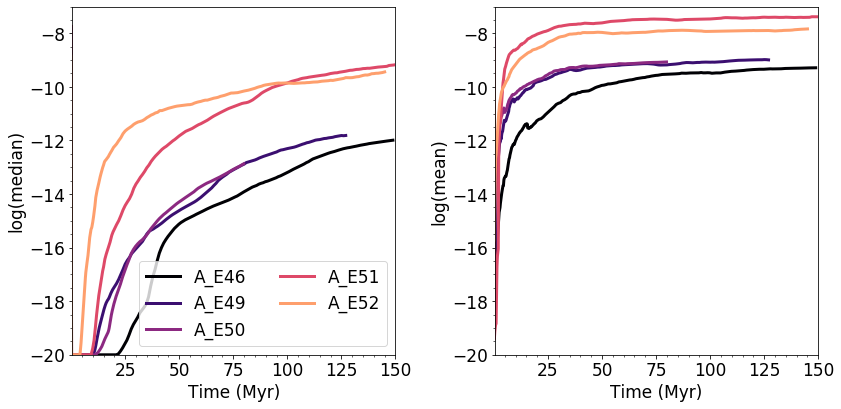

In [27]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(12,6)
plt.minorticks_on()

e = 'average'

ci = 0
for run in ['AGB1','NSNS1','NSNS3','SNE1','HNE1']:
    color = run_color_dict[run]

    median   = all_data['CNM'][run]['median'][e]
    mean     = all_data['CNM'][run]['mean'][e]
    times    = all_data['CNM'][run]['hist']['time']
    
    
    ax[0].plot(times, median, lw = 3, color = color, label = run_label_dict[run], ls = '-')
    ax[1].plot(times, mean  , lw = 3, color = color, label = run_label_dict[run], ls = '-')
    
    ci = ci + 1
    
ax[0].legend(loc='best',ncol=2)

ax[0].set_ylabel('log(median)')
ax[1].set_ylabel('log(mean)')

for i in np.arange(2):
    ax[i].set_xlabel('Time (Myr)')
    ax[i].set_ylim(-20,-7)
    ax[i].set_xlim(0.5,150.0)
    
    ax[i].xaxis.set_minor_locator(AutoMinorLocator())
    ax[i].yaxis.set_minor_locator(AutoMinorLocator())


plt.tight_layout()
plt.minorticks_on()
fig.savefig('mean_median_evolution.png')


0.1106092005789539
0.49046793238659137
0.539056422640322
0.7048903292152613
0.19562360380590554
0.47291742535439973
0.5950290296198936
0.759861052074608
0.2585523903874298
0.5654974519229057
0.6665808672314869
0.8810866298083733
0.44811608512154655
0.7658315084229188
0.9112589069932999
0.9983413948219655


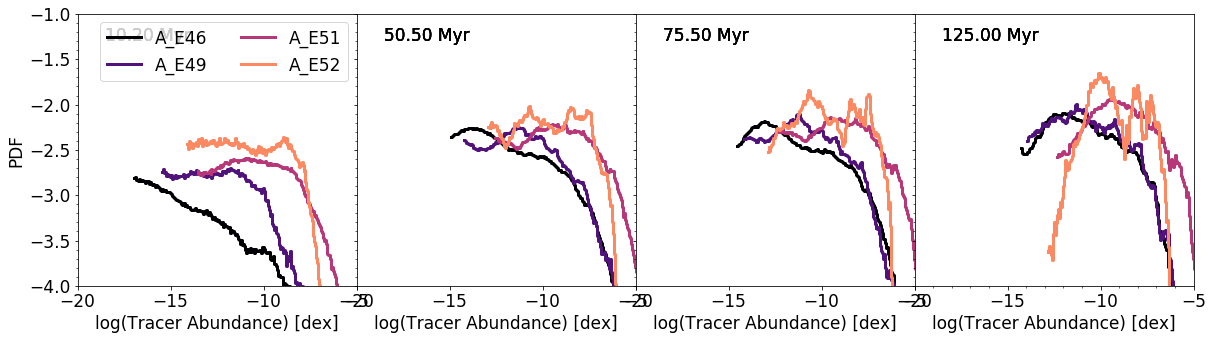

In [24]:
#
# ty and plot a PDF or two
# 
fig,ax = plt.subplots(1,4, sharey=True)
fig.set_size_inches(4*5,1*5)
plt.subplots_adjust(wspace=0)

def plotable_hist(x):
    x2      = np.ones(np.size(x)+1)
    x2[:-1] = x
    x2[-1]  = x[-2]
    return x2
    
    
center = 'mean'
center = None
plot_mean_median = False

lines = {'AGB1' : '-', 'NSNS1' : '--', 'NSNS3' : '-.', 'SNE1' : (0,(3,1,1,1,1,1)) , 'HNE1' : ':'}

    
e = 'combined'
e = 'average'
plot_times =  [10.2, 50.5, 75.5, 125.0]




for i,time in enumerate(plot_times):
    ax[i].set_xlabel('log(Tracer Abundance) [dex]')
    #ax[i].set_ylabel('PDF')
    if center == 'mean':
        ax[i].set_xlim(-10,5)
    elif center == 'median':
        ax[i].set_xlim(-8,8)
    else:
        ax[i].set_xlim(-20,-5)
    ax[i].set_ylim(-4,-1)
ax[0].set_ylabel('PDF')
    


ci = 0
for run in ['AGB1','NSNS1','SNE1','HNE1']:
    color = magma(ci/(1.0*4))
    
    


    for i,time in enumerate(plot_times):
        
        
    
        agb_hist = all_data['CNM'][run]['hist']
        median = all_data['CNM'][run]['median']
        mean   = all_data['CNM'][run]['mean']
        times    = all_data['CNM'][run]['hist']['time']
        index = int(np.argmin( np.abs(times - time) ))


        if center == 'median':
            shift = median[e][index]
        elif center == 'mean':
            shift = mean[e][index]
        else:
            shift = 0.0
    
    
        plot_hist = 1.0 * agb_hist[e][index]
        
        if np.size(plot_hist) == 401:
            plot_hist=plot_hist[:-1]
        
        
        plot_hist[ np.log10(zbins[:-1]) < mean[e][index] - 5] = None
    
        ax[i].step(np.log10(zbins) - shift,
                    plotable_hist(plot_hist), where='post', lw = 3,
                    color = color, label = run_label_dict[run]) #label = '%0.2f Myr'%times[index],
    
        xytext = (0.1,0.9)
        ax[i].annotate("%0.2f Myr"%(time),xy=xytext,xycoords="axes fraction")
        
        
        print(np.cumsum(10.0**(plot_hist[np.log10(zbins[:-1]) > mean[e][index] - 5]))[-1])

#for i,index in enumerate(plot_i):
        if plot_mean_median:
            if center == 'mean':
                ax[i].plot( [median[e][index] - mean[e][index]]*2,   ax[i].get_ylim(), ls = '-', lw = 3, color = color)
                ax[i].plot([0,0],ax[i].get_ylim(),ls='--',lw=2,color='black')
            elif center == 'median':
                ax[i].plot( [mean[e][index] - median[e][index]]*2,   ax[i].get_ylim(), ls = '--', lw = 3, color = color)
                ax[i].plot([0,0],ax[i].get_ylim(),ls='--',lw=2,color='black')
            else:
                ax[i].plot( [median[e][index]]*2,   ax[i].get_ylim(), ls = '-', lw = 3, color = color)
                ax[i].plot( [mean[e][index]]*2,   ax[i].get_ylim(), ls = '--', lw = 3, color = color)
            
    ci = ci + 1

    
    
    
ax[0].legend(loc='upper right', ncol = 2)

plt.minorticks_on()
#plt.tight_layout()
#print(zbins)

outname = 'cut_histograms'
if plot_mean_median:
    outname += '_marked'
if center == 'median':
    outname += '_median_norm'
elif center == 'mean':
    outname += '_mean_norm'
outname += '.png'

fig.savefig(outname)

In [124]:
cutdict = {}
for run in ['AGB1','NSNS1','NSNS3','SNE1','HNE1']:
    cutdict[run] = {}

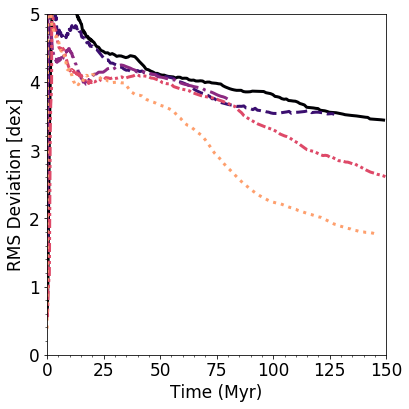

In [125]:
fig,ax = plt.subplots(1)
fig.set_size_inches(6,6)
plt.minorticks_on()
lines = {'AGB1' : '-', 'NSNS1' : '--', 'NSNS3' : '-.', 'SNE1' : (0,(3,1,1,1,1,1)) , 'HNE1' : ':'}

e = 'average'

cutval = 8

ci = 0

#dz = np.log10(zbins[1:]) - np.log10(zbins[:-1])

dz = zbins[1:]-zbins[:-1]
dz = 1.0

for run in ['AGB1','NSNS1','NSNS3','SNE1','HNE1']:
    
    times    = all_data['CNM'][run]['hist']['time']

    color = run_color_dict[run]
    median   = all_data['CNM'][run]['median'][e]
    mean     = all_data['CNM'][run]['mean'][e]
    hist     = all_data['CNM'][run]['hist'][e]
    
    
    new_mean = np.zeros(np.size(times))
    new_std  = np.zeros(np.size(times))
    for i in np.arange(np.size(times)):
        temphist = hist[i]*1.0      
        temphist[ np.log10(zbins[:-1]) < (mean[i] - cutval)] = -np.inf    
        W = 1.0 * 10**(temphist)/ (1.0*np.sum(10.0**(temphist))) /dz
        # X = np.log10(1.0 * zbins[:-1])    
        X = 0.5*(zbins[1:] + zbins[:-1])
        new_mean[i] = np.log10(np.sum(X*W) / np.sum(W))
        
        new_mean[i] = mean[i]
        
        # np.matmul(X,np.transpose(W)) / np.sum(W)
        N = 1.0*np.size(W)
        N = 2.0
        #print(np.sqrt(N-1))
        new_std[i]  = np.sqrt( ( np.sum(W*(np.log10(X)-new_mean[i])**2))/(np.sum(W))/((N-1)))
        

    cutdict[run][cutval] = new_std[-1]
    #print(new_mean, new_std)
    
    ax.plot(times, new_std, lw = 3, color = color, label = run_label_dict[run], ls = lines[run])#, ls = '-')
    #ax.plot(times, np.log10(new_std)  , lw = 3, color = color, label = run_label_dict[run], ls = '--')
    #print(new_std)
    ci = ci + 1
#print(new_mean)
#print(new_std)
#ax.legend(loc='best',ncol=2)

ax.set_ylabel('RMS Deviation [dex]')

ax.set_xlabel('Time (Myr)')
#ax.set_ylim(-20,-7)
ax.set_xlim(0.0,150.0)
ax.set_ylim(0.0,5.0)
    
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())


plt.tight_layout()
plt.minorticks_on()
fig.savefig('CNM_average_rms.png')



(0, 8)

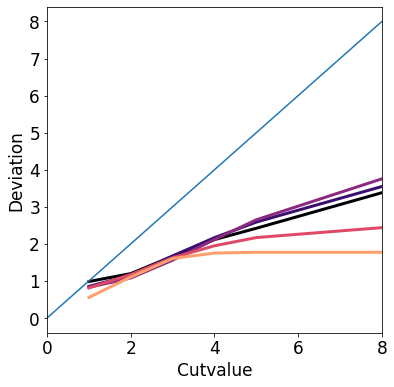

In [92]:
fig,ax=plt.subplots()
fig.set_size_inches(6,6)
for run in cutdict.keys():
    ax.plot( np.array(list(cutdict[run].keys())), np.array(list(cutdict[run].values())), lw = 3, 
             color = run_color_dict[run],ls = '-')
    
ax.set_xlabel('Cutvalue')
ax.set_ylabel('Deviation')
ax.plot([0,8],[0,8])
ax.set_xlim(0,8)

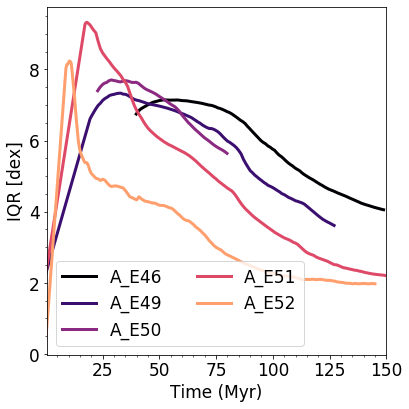

In [92]:
fig,ax = plt.subplots(1)
fig.set_size_inches(6,6)
plt.minorticks_on()

e = 'average'
cutval = 5

ci = 0

#dz = np.log10(zbins[1:]) - np.log10(zbins[:-1])

#dz = zbins[1:]-zbins[:-1]
dz = 1.0

for run in ['AGB1','NSNS1','NSNS3','SNE1','HNE1']:
    
    times    = all_data['CNM'][run]['hist']['time']

    color = run_color_dict[run]
    median   = all_data['CNM'][run]['median'][e]
    
    
    
    q1       = all_data['CNM'][run]['Q1'][e]
    q3       = all_data['CNM'][run]['Q3'][e]
    
    select = (q1 > -20)
    
    ax.plot(times[select], q3[select]-q1[select], lw = 3, color = color, label = run_label_dict[run], ls = '-')
    
    ci = ci + 1
#print(new_mean)
#print(new_std)
ax.legend(loc='best',ncol=2)

ax.set_ylabel('IQR [dex]')

ax.set_xlabel('Time (Myr)')
#ax.set_ylim(-20,-7)
ax.set_xlim(0.5,150.0)
    
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())


plt.tight_layout()
plt.minorticks_on()
fig.savefig('IQR_evolution.png')



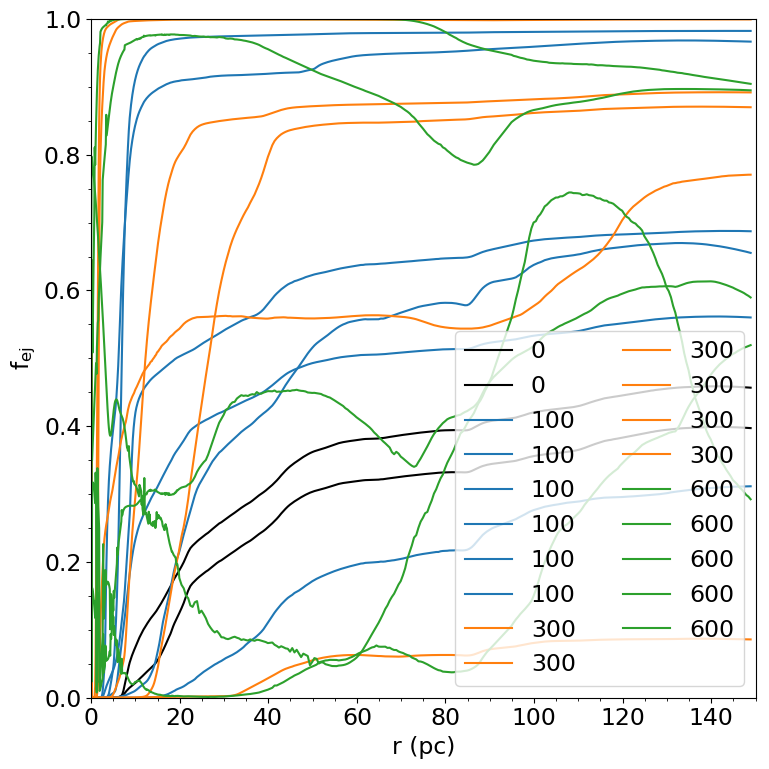

In [9]:
run = 'AGB1'

select  = (event_data[run]['z'] == 0.0) 
select  = (event_data[run]['z'] > -10000)
tracers = event_data[run]['Element'][select]
r       = event_data[run]['r_cyl'][select]

tracers = tracers[np.argsort(r)]
r       = r[np.argsort(r)]


fig, ax = plt.subplots()
fig.set_size_inches(8,8)


radial_colors = {"0" : 'black', "100" : "C0", "300" : "C1" , "600" : "C2"}


plot_time = 10.0
yvals     = np.zeros(np.size(r))
for i,t in enumerate(tracers):
    
    data = np.genfromtxt('/home/aemerick/work/enzo_runs/mixing_experiment/' + run +\
                         '/' + t + '_enrichment_evolution.dat', names = True)
    
    func = lambda x, phase : np.interp(x, data['time'], data[phase])
    
    yvals[i] = func(plot_time,'CGM')
    
    ax.plot(data['time'],data['CGM'], color = radial_colors["%0.0f"%(r[i])], label = "%.0f"%(r[i]))
    
#ax.scatter( r, yvals, label = run + " %.0f"%(plot_time), s = 20)

ax.set_xlabel('r (pc)')
ax.set_ylabel(r'f$_{\rm ej}$')
ax.set_ylim(0,1.0)
ax.set_xlim(0.0, 150.0)
ax.legend(loc='best',ncol=2)

plt.minorticks_on()
plt.tight_layout()
    
    

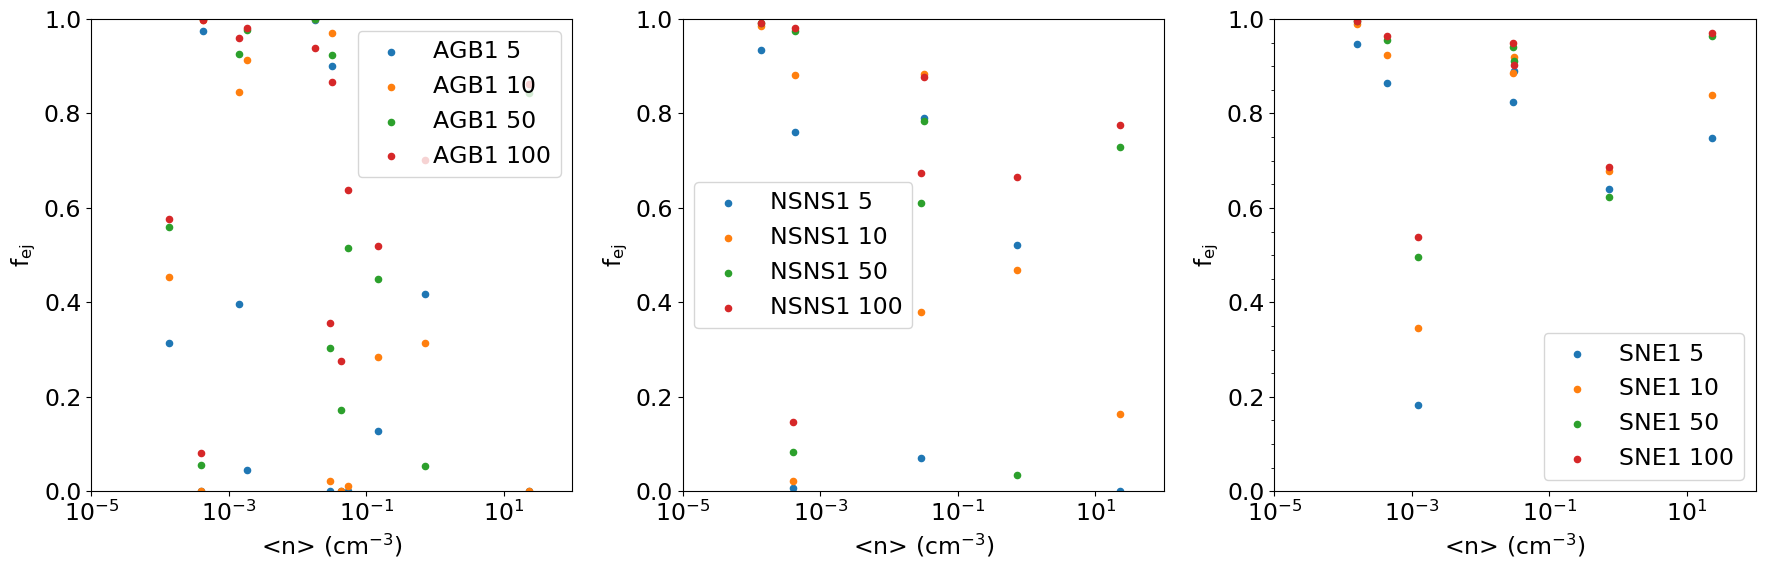

In [10]:
run = 'AGB1'

#select  = (event_data[run]['z'] == 0.0) 


fig, axes = plt.subplots(1,3)
fig.set_size_inches(18,6)


#radial_colors = {"0" : 'black', "100" : "C0", "300" : "C1" , "600" : "C2"}

for ax,run in zip(axes,['AGB1','NSNS1','SNE1']):
    select = event_data[run]['z'] == 0.0

    tracers = event_data[run]['Element'][select]
    n       = event_data[run]['n_m'][select]
    
    for plot_time in [5,10.0, 50.0, 100.0]:

        yvals     = np.zeros(np.size(n))
        for i,t in enumerate(tracers):
    
            data = np.genfromtxt('/home/aemerick/work/enzo_runs/mixing_experiment/' + run +\
                             '/' + t + '_enrichment_evolution.dat', names = True)
    
            func = lambda x, phase : np.interp(x, data['time'], data[phase])
    
            yvals[i] = func(plot_time,'CGM')
    
        #ax.plot(data['time'],data['CGM'], color = radial_colors["%0.0f"%(r[i])], label = "%.0f"%(r[i]))
    
        ax.scatter( n, yvals, label = run + " %.0f"%(plot_time), s = 20)

    ax.set_xlabel(r'<n> (cm$^{-3}$)')
    ax.set_ylabel(r'f$_{\rm ej}$')
    ax.set_ylim(0,1.0)
    ax.set_xlim(1.0E-5,1.0E2)
    ax.semilogx()
    ax.legend(loc='best',ncol=1)

plt.minorticks_on()
plt.tight_layout()
    
    

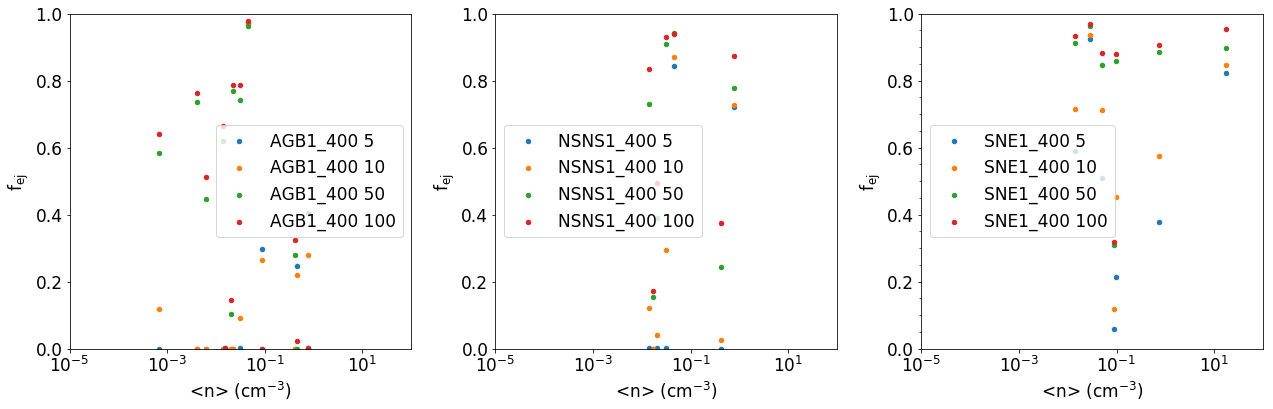

In [48]:
run = 'AGB1'

#select  = (event_data[run]['z'] == 0.0) 


fig, axes = plt.subplots(1,3)
fig.set_size_inches(18,6)


#radial_colors = {"0" : 'black', "100" : "C0", "300" : "C1" , "600" : "C2"}

for ax,run in zip(axes,['AGB1_400','NSNS1_400','SNE1_400']):
    select = event_data[run]['z'] == 0.0

    tracers = event_data[run]['Element'][select]
    n       = event_data[run]['n_m'][select]
    
    for plot_time in [5,10.0, 50.0, 100.0]:

        yvals     = np.zeros(np.size(n))
        for i,t in enumerate(tracers):
    
            data = np.genfromtxt('/home/aemerick/work/enzo_runs/mixing_experiment/' + run +\
                             '/' + t + '_enrichment_evolution.dat', names = True)
    
            func = lambda x, phase : np.interp(x, data['time'], data[phase])
    
            yvals[i] = func(plot_time,'CGM')
    
        #ax.plot(data['time'],data['CGM'], color = radial_colors["%0.0f"%(r[i])], label = "%.0f"%(r[i]))
    
        ax.scatter( n, yvals, label = run + " %.0f"%(plot_time), s = 20)

    ax.set_xlabel(r'<n> (cm$^{-3}$)')
    ax.set_ylabel(r'f$_{\rm ej}$')
    ax.set_ylim(0,1.0)
    ax.set_xlim(1.0E-5,1.0E2)
    ax.semilogx()
    ax.legend(loc='best',ncol=1)

plt.minorticks_on()
plt.tight_layout()
    
    

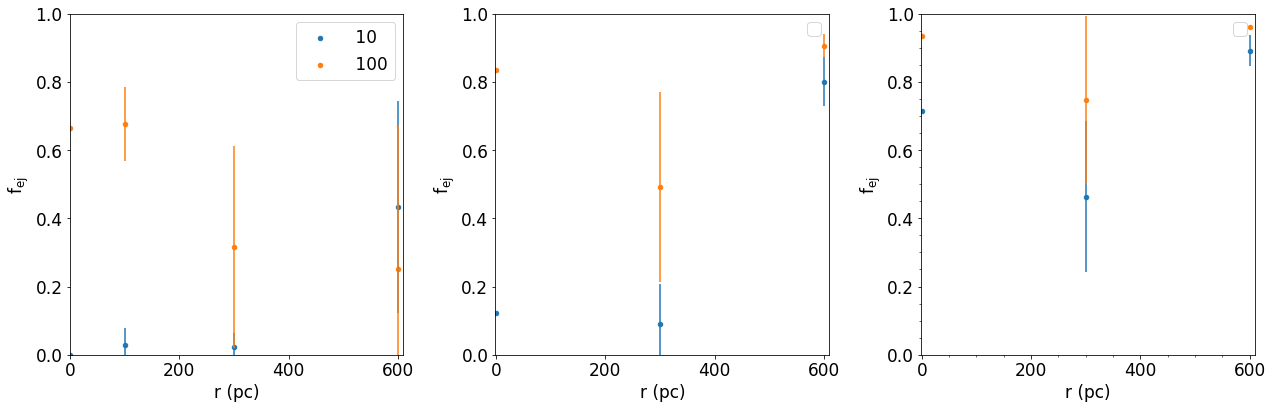

In [7]:
run = 'AGB1'

#select  = (event_data[run]['z'] == 0.0) 


fig, axes = plt.subplots(1,3)
fig.set_size_inches(18,6)


#radial_colors = {"0" : 'black', "100" : "C0", "300" : "C1" , "600" : "C2"}
k = 0
for ax,run in zip(axes,['AGB1_400','NSNS1_400','SNE1_400']):
    
    select = event_data[run]['z'] == 0.0

    tracers = event_data[run]['Element'][select]
    r       = event_data[run]['r_cyl'][select]
    
    for j,plot_time in enumerate([ 10.0,100]):

        yvals     = np.zeros(np.size(r))
        for i,t in enumerate(tracers):
    
            data = np.genfromtxt('/home/aemerick/work/enzo_runs/mixing_experiment/' + run +\
                             '/' + t + '_enrichment_evolution.dat', names = True)
    
            func = lambda x, phase : np.interp(x, data['time'], data[phase])
    
            yvals[i] = func(plot_time,'CGM')
    
        #ax.plot(data['time'],data['CGM'], color = radial_colors["%0.0f"%(r[i])], label = "%.0f"%(r[i]))
    
        l = 0
        for rval in np.unique(r):
            x = rval
            y = np.average( yvals[ r == rval])
            std = np.std(yvals[r == rval])

            if k == 0 and l == 0:
                ax.scatter( x, y, label = " %.0f"%(plot_time), s = 20, color = "C%i"%(j))
            else:
                ax.scatter( x, y, s = 20, color = "C%i"%(j))
            ax.errorbar( x, y, std, color = 'C%i'%(j))

            l = l + 1
    ax.set_xlabel(r'r (pc)')
    ax.set_ylabel(r'f$_{\rm ej}$')
    ax.set_ylim(0,1.0)
    ax.set_xlim(-1, 610.0)
    
    ax.legend(loc='best',ncol=1)
    k = k + 1

plt.minorticks_on()
plt.tight_layout()
    
    

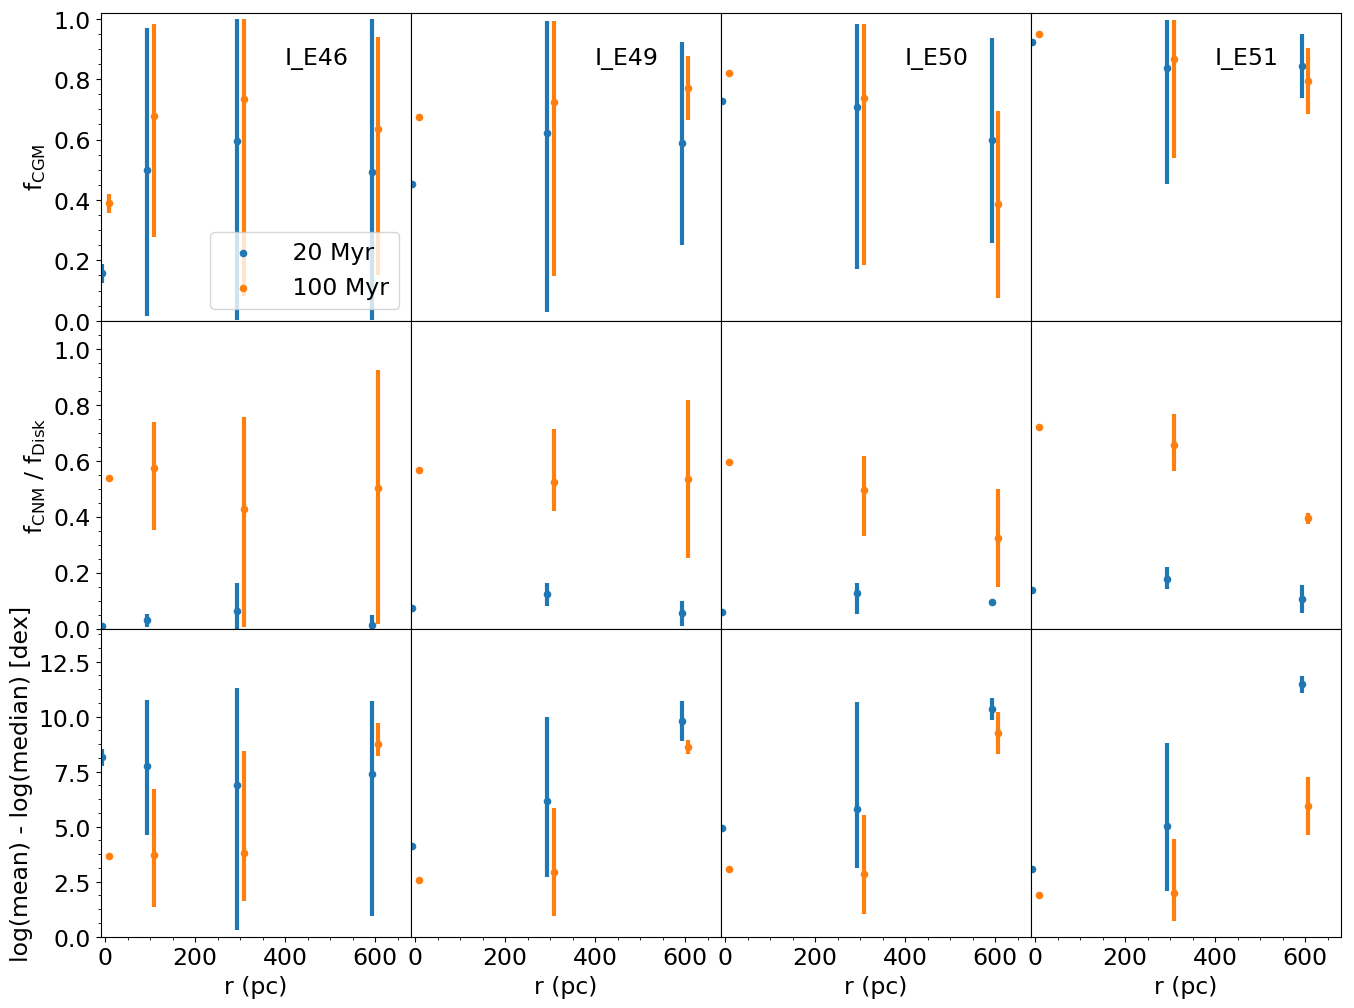

In [27]:
run = 'AGB1'

#select  = (event_data[run]['z'] == 0.0) 

runs_to_plot = ['AGB1','NSNS1','NSNS3','SNE1']

fig, all_axes = plt.subplots(3,len(runs_to_plot), sharex=True,sharey=False)
inches = 4
fig.set_size_inches(inches*len(runs_to_plot),inches*3)
fig.subplots_adjust(wspace=0,hspace=0)


#radial_colors = {"0" : 'black', "100" : "C0", "300" : "C1" , "600" : "C2"}
m = 0
for phase,axes in zip(['CGM','CNM','mean-median'],all_axes):

    k = 0
    for ax,run in zip(axes,runs_to_plot):
    
        select = event_data[run]['z'] >=-9999 #== 0.0

        tracers = event_data[run]['Element'][select]
        r       = event_data[run]['r_cyl'][select]

        
        if m == 0:
            xy = (400.0, 0.85)
            ax.annotate(run_label_dict[run], xy, xytext=xy, textcoords = 'data')
        
        for j,plot_time in enumerate([ 20.0,100]):

         
            yvals     = np.zeros(np.size(r))
            for i,t in enumerate(tracers):
                if phase == 'mean-median':
                
                    if run in all_data['CNM'].keys():
                        x,y = _get_plot_values('CNM', run, 'mean-median', t)       
                        func = lambda xval :  np.interp(xval, x, y)
                    
                        yvals[i] = func(plot_time)
                    else:
                        continue            
                else:    
                    data = np.genfromtxt('/home/aemerick/work/enzo_runs/mixing_experiment/' + run +\
                                 '/' + t + '_enrichment_evolution.dat', names = True)
    
                    func = lambda x, pname : np.interp(x, data['time'], data[pname])
    
                    if phase in ['CNM','WNM','WIM','HIM']:
                        yvals[i] = func(plot_time,phase) / func(plot_time,'Disk')
                    elif phase == 'CGM':
                        yvals[i] = func(plot_time, phase)
    
            #ax.plot(data['time'],data['CGM'], color = radial_colors["%0.0f"%(r[i])], label = "%.0f"%(r[i]))
    
            l = 0
            for rval in np.unique(r):
                x = rval + (j*2 - 1)*7.5
                select = r == rval
                y = np.average( yvals[select])
                std = np.std(yvals[select])
            
                if k == 0 and l == 0:
                    ax.scatter( x, y, label = " %.0f Myr"%(plot_time), s = 20, color = "C%i"%(j))
                else:
                    ax.scatter( x, y, s = 20, color = "C%i"%(j))
                
                #print run, np.max(yvals[select])
                ax.errorbar(x, y, 
                            yerr = [[y- np.min(yvals[select])], [np.max(yvals[select]) - y]], color = 'C%i'%(j),
                            lw = 3)
                

                l = l + 1
                
        if m == 2:
            ax.set_xlabel(r'r (pc)')
        
        if m == 0 and (k == 0):
            ax.set_ylabel(r'f$_{\rm ' + phase + '}$')
        elif m == 1 and (k == 0):
            ax.set_ylabel(r'f$_{\rm ' + phase + r'}$')# / f$_{\rm Disk}$')
        elif m == 2 and (k == 0):
            ax.set_ylabel(r'log(mean) - log(median) [dex]')

        if m == 2:
            ax.set_ylim(0,14)
        elif m == 1:
            ax.set_ylim(0,1.1)
        elif m == 0:
            ax.set_ylim(0,1.02)
        #ax.set_ylim(1.0E-3,2.0)
             #ax.semilogy()
        ax.set_xlim(-10, 679.0)
        
        if k > 0:
            ax.get_yaxis().set_visible(False)
    
        k = k + 1
        
        plt.minorticks_on()
        #plt.tight_layout()
    
        ax.minorticks_on()
    m = m + 1
    
all_axes[(0,0)].legend(loc='lower right',ncol=1)

fig.savefig("II_radial_dependence.png",bbox_inhces="tight")


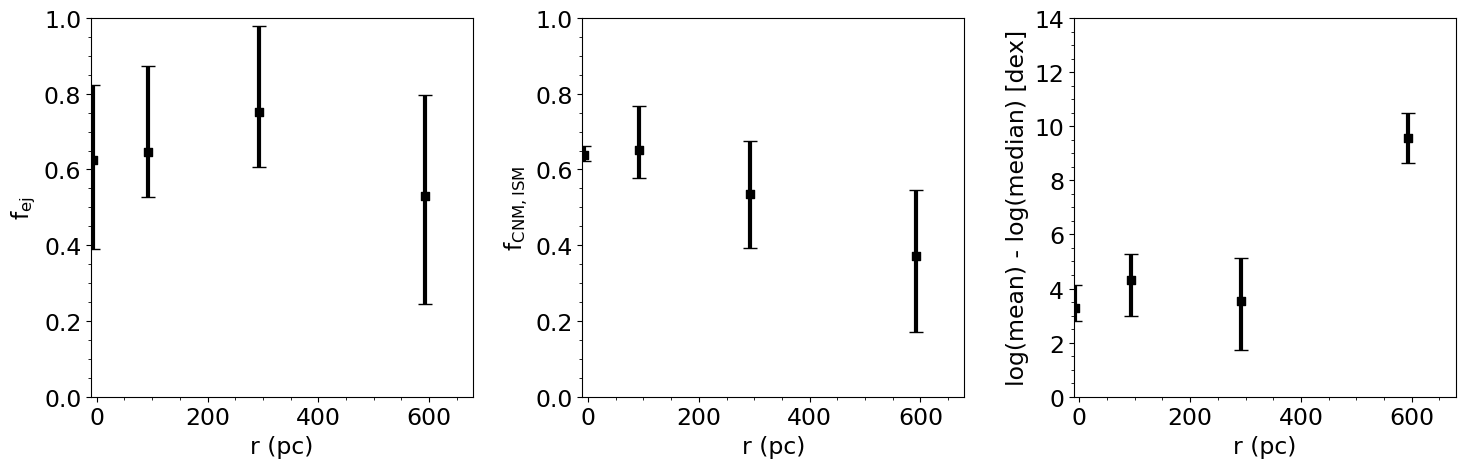

In [37]:
run = 'AGB1'

#select  = (event_data[run]['z'] == 0.0) 

runs_to_plot = ['AGB1','NSNS1','NSNS3','SNE1']
markers = {"AGB1":'o',"NSNS1":'s','NSNS3':"v",'SNE1':"*"}

average_points = True

fig, all_axes = plt.subplots(1,3) # sharex=True,sharey=False)
inches = 5
fig.set_size_inches(inches*3,inches*1)
#fig.subplots_adjust(wspace=0,hspace=0)

#radial_colors = {"0" : 'black', "100" : "C0", "300" : "C1" , "600" : "C2"}
m = 0
for phase, ax in zip(['CGM','CNM','mean-median'],all_axes):

    k = 0
    all_yvals = [None]*len(runs_to_plot)
    all_rvals = [None]*len(runs_to_plot)
    for run in runs_to_plot:
    
        select = event_data[run]['z'] >=-9999 #== 0.0

        tracers = bytes_to_string(event_data[run]['Element'][select])
        r       = event_data[run]['r_cyl'][select]

        
        #if m == 0:
        #    xy = (400.0, 0.85)
        #    ax.annotate(run_label_dict[run], xy, xytext=xy, textcoords = 'data')
        
        for j,plot_time in enumerate([ plot_time_scatter]):
   
            yvals     = np.zeros(np.size(r))
            for i,t in enumerate(tracers):
                if phase == 'mean-median':
                
                    if run in all_data['CNM'].keys():
                        x,y = _get_plot_values('CNM', run, 'mean-median', t)       
                        func = lambda xval :  np.interp(xval, x, y)                    
                        yvals[i] = func(plot_time)
                    else:
                        continue            
                else:    
                    data = np.genfromtxt('/home/aemerick/work/enzo_runs/mixing_experiment/' + run +\
                                 '/' + t + '_enrichment_evolution.dat', names = True)
    
                    func = lambda xt, pname : np.interp(xt, data['time'], data[pname])
                    if phase in ['CNM','WNM','WIM','HIM']:
                        yvals[i] = func(plot_time,phase) / func(plot_time,'Disk')
                    elif phase == 'CGM':
                        yvals[i] = func(plot_time, phase)
    
            #ax.plot(data['time'],data['CGM'], color = radial_colors["%0.0f"%(r[i])], label = "%.0f"%(r[i]))
    
            if average_points:
                all_rvals[k] = 1.0*r
                all_yvals[k] = 1.0*yvals
            else:
                l = 0
                for rval in np.unique(r):
                    x = rval + (j*2 - 1)*7.5 # offset points at different times
                    select = r == rval
                
                
 
                    ax.scatter( x*np.ones(np.size(yvals[select])),
                                yvals[select], s = 20, marker = "o", color = "black")
                               #marker = markers[run], color = "C%i"%(k))
                

                    l = l + 1
           
   
            
        ax.set_xlabel(r'r (pc)')


        if m == 2:
            ax.set_ylim(0,14)
        elif m == 1:
            ax.set_ylim(0,1.)
        elif m == 0:
            ax.set_ylim(0,1.)
        #ax.set_ylim(1.0E-3,2.0)
             #ax.semilogy()
        ax.set_xlim(-10, 679.0)
        
    
        k = k + 1
        
        plt.minorticks_on()
        plt.tight_layout()
    
        ax.minorticks_on()
        
    if average_points:

        all_rvals = np.concatenate(all_rvals,axis=None)
        all_yvals = np.concatenate(all_yvals,axis=None)
        
                
        for rval in np.unique(all_rvals):
            x = rval + (j*2 - 1)*7.5 # offset points at different times
            select = all_rvals == rval
            
            y = np.average( all_yvals[select])
            std = np.std(all_yvals[select])
            
            q1 = np.percentile(all_yvals[select], 25)
            q3 = np.percentile(all_yvals[select], 75)
            diff = q3-q1
            
            #print(std, q1, q3, diff, 2*std)
            #if k == 0 and l == 0:
            #    ax.scatter( x, y, label = " %.0f Myr"%(plot_time), s = 20, color = "C%i"%(j))
            #else:
            ax.scatter( x, y, s = 40, color = "black", marker = "s")
                
            #print run, np.max(yvals[select])
            ax.errorbar(x, y, 
                    yerr = [[y-q1], [q3-y]], color = "black",
                    lw = 3, capsize = 5)
            
    if m == 0:
       # ax.set_ylabel(r'f$_{\rm ' + phase + '}$')
        ax.set_ylabel(r'f$_{\rm ej}$')
    elif m == 1:
        ax.set_ylabel(r'f$_{\rm ' + phase + r', ISM}$') # / f$_{\rm Disk}$')
    elif m == 2:
        ax.set_ylabel(r'log(mean) - log(median) [dex]')
    m = m + 1
    
#all_axes[0].legend(loc='lower right',ncol=1)
plt.tight_layout()        

fig.savefig("Eej_combined_radial_dependence.png",bbox_inhces="tight")


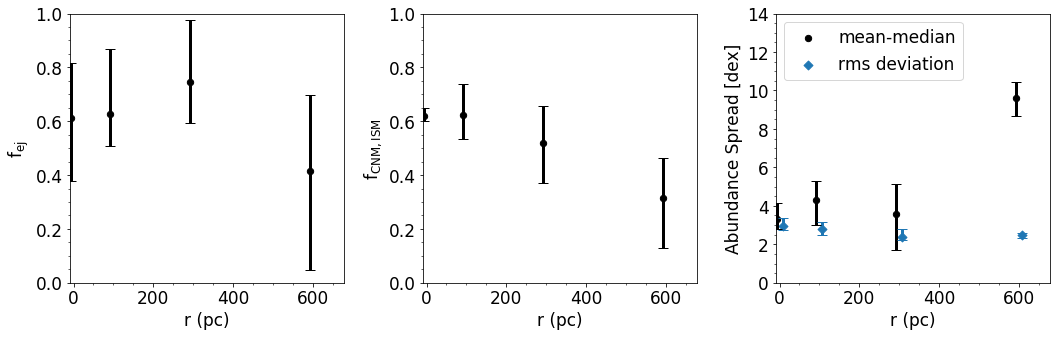

In [147]:
run = 'AGB1'

#select  = (event_data[run]['z'] == 0.0) 

runs_to_plot = ['AGB1','NSNS1','NSNS3','SNE1']
markers = {"AGB1":'o',"NSNS1":'s','NSNS3':"v",'SNE1':"*"}

average_points = True

fig, all_axes = plt.subplots(1,3) # sharex=True,sharey=False)
inches = 5
fig.set_size_inches(inches*3,inches*1)
#fig.subplots_adjust(wspace=0,hspace=0)

#radial_colors = {"0" : 'black', "100" : "C0", "300" : "C1" , "600" : "C2"}
m = 0
for phase, ax in zip(['CGM','CNM','mean-median','rms'], [all_axes[0],all_axes[1],all_axes[2],all_axes[-1]]):

    k = 0
    all_yvals = [None]*len(runs_to_plot)
    all_rvals = [None]*len(runs_to_plot)
    
    marker = 'o'
    color  = 'black'
    offset = 0.0
    if phase == 'rms':
        marker = 'D'
        color  = 'C0'
        offset = 15.0
    
    
    for run in runs_to_plot:
    
        select = event_data[run]['z'] >=-9999 #== 0.0

        tracers = bytes_to_string(event_data[run]['Element'][select])
        r       = event_data[run]['r_cyl'][select]

        
        #if m == 0:
        #    xy = (400.0, 0.85)
        #    ax.annotate(run_label_dict[run], xy, xytext=xy, textcoords = 'data')
        
        for j,plot_time in enumerate([ plot_time_scatter]):

            yvals     = np.zeros(np.size(r))
            for i,t in enumerate(tracers):
                if phase == 'rms':
                
                    if run in all_data['CNM'].keys():
                        x,y = _get_plot_values('CNM', run, 'rms', t)       
                        func = lambda xval :  np.interp(xval, x, y)                    
                        yvals[i] = func(plot_time)
                        continue   
                        

                    
                elif phase == 'mean-median':
                
                    if run in all_data['CNM'].keys():
                        x,y = _get_plot_values('CNM', run, 'mean-median', t)       
                        func = lambda xval :  np.interp(xval, x, y)                    
                        yvals[i] = func(plot_time)
                    else:
                        continue                         
                else:    
                    data = np.genfromtxt('/home/aemerick/work/enzo_runs/mixing_experiment/' + run +\
                                 '/' + t + '_enrichment_evolution.dat', names = True)
    
                    func = lambda xt, pname : np.interp(xt, data['time'], data[pname])
                    if phase in ['CNM','WNM','WIM','HIM']:
                        yvals[i] = func(plot_time,phase) / func(plot_time,'Disk')
                    elif phase == 'CGM':
                        yvals[i] = func(plot_time, phase)
    
            #ax.plot(data['time'],data['CGM'], color = radial_colors["%0.0f"%(r[i])], label = "%.0f"%(r[i]))
    
            if average_points:
                all_rvals[k] = 1.0*r
                all_yvals[k] = 1.0*yvals
            else:
                l = 0
                for rval in np.unique(r):
                    x = rval + (j*2 - 1)*7.5 # offset points at different times
                    select = r == rval
                
                
 
                    ax.scatter( x*np.ones(np.size(yvals[select])),
                                yvals[select], s = 20, marker = marker, color = color)
                               #marker = markers[run], color = "C%i"%(k))
                

                    l = l + 1
           
   
            
        ax.set_xlabel(r'r (pc)')


        if m == 2:
            ax.set_ylim(0,14)
        elif m == 1:
            ax.set_ylim(0,1.)
        elif m == 0:
            ax.set_ylim(0,1.)
        #ax.set_ylim(1.0E-3,2.0)
             #ax.semilogy()
        ax.set_xlim(-10, 679.0)
        
    
        k = k + 1
        
        plt.minorticks_on()
        plt.tight_layout()
    
        ax.minorticks_on()
        
    if average_points:

        all_rvals = np.concatenate(all_rvals,axis=None)
        all_yvals = np.concatenate(all_yvals,axis=None)
        
                
        for rval in np.unique(all_rvals):
            x = rval + (j*2 - 1)*7.5 # offset points at different times
            select = all_rvals == rval
            
            y = np.average( all_yvals[select])
            std = np.std(all_yvals[select])
            
            q1 = np.percentile(all_yvals[select], 25)
            q3 = np.percentile(all_yvals[select], 75)
            diff = q3-q1
            
            #print(std, q1, q3, diff, 2*std)
            #if k == 0 and l == 0:
            #    ax.scatter( x, y, label = " %.0f Myr"%(plot_time), s = 20, color = "C%i"%(j))
            #else:
            
            ax.scatter( x+offset, y, s = 40, color = color, marker = marker)
                
            #print run, np.max(yvals[select])
            ax.errorbar(x+offset, y, 
                    yerr = [[y-q1], [q3-y]], color = color,
                    lw = 3, capsize = 5)
            
    if m == 0:
       # ax.set_ylabel(r'f$_{\rm ' + phase + '}$')
        ax.set_ylabel(r'f$_{\rm ej}$')
    elif m == 1:
        ax.set_ylabel(r'f$_{\rm ' + phase + r', ISM}$') # / f$_{\rm Disk}$')
    elif m == 2 or m == 3:
        ax.set_ylabel(r'Abundance Spread [dex]')
        
        if m == 2:
            ax.scatter([-10,-10],[-10,-10], color = color,s = 40, marker=marker,
                       label = 'mean-median')
        elif m == 3:
            ax.scatter([-10,-10],[-10,-10], color = color,s = 40, marker=marker,
                       label = 'rms deviation')        
            
        
    m = m + 1
    
all_axes[2].legend(loc='upper left',ncol=1)

#all_axes[0].legend(loc='lower right',ncol=1)
plt.tight_layout()        

fig.savefig("Eej_rms_combined_radial_dependence.png",bbox_inhces="tight")


In [91]:
plot_time_scatter

75.0

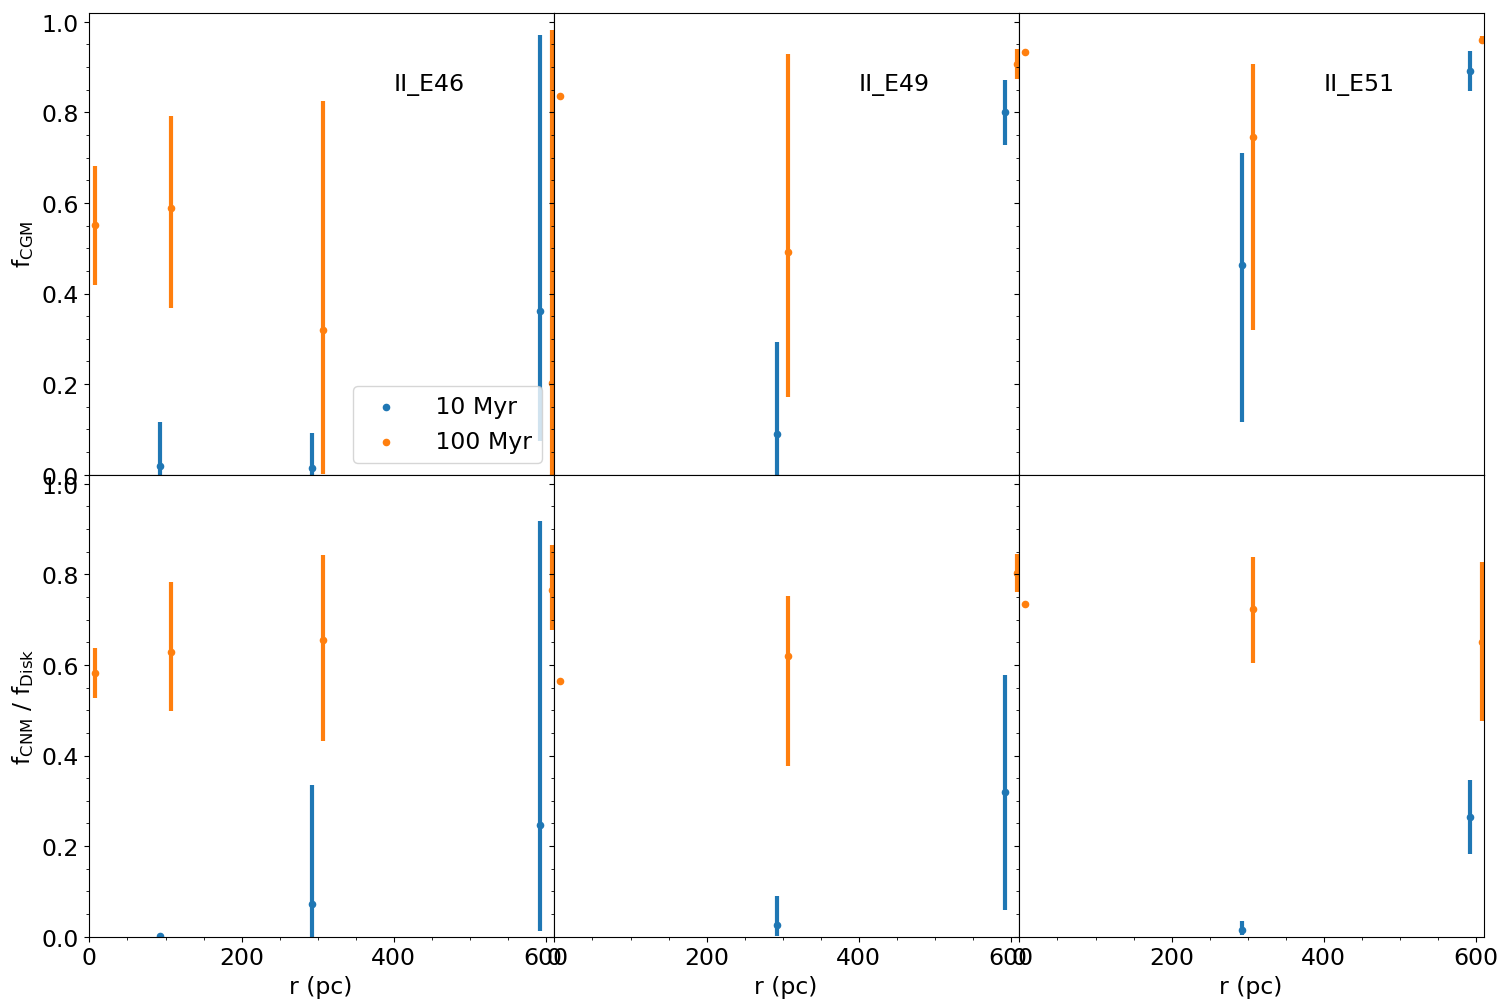

In [11]:

#select  = (event_data[run]['z'] == 0.0) 


fig, all_axes = plt.subplots(2,3, sharex=True,sharey=True)
fig.set_size_inches(18,12)
fig.subplots_adjust(wspace=0,hspace=0)


#radial_colors = {"0" : 'black', "100" : "C0", "300" : "C1" , "600" : "C2"}
m = 0
for phase,axes in zip(['CGM','CNM'],all_axes):

    k = 0
    for ax,run in zip(axes,['AGB1_400','NSNS1_400','SNE1_400']):
    
        select = event_data[run]['z'] >= -9999 #== 0.0

        tracers = event_data[run]['Element'][select]
        r       = event_data[run]['r_cyl'][select]

        
        if m == 0:
            xy = (400.0, 0.85)
            ax.annotate(run_label_dict[run], xy, xytext=xy, textcoords = 'data')
        
        for j,plot_time in enumerate([ 10.0,100]):

            yvals     = np.zeros(np.size(r))
            for i,t in enumerate(tracers):
    
                data = np.genfromtxt('/home/aemerick/work/enzo_runs/mixing_experiment/' + run +\
                                 '/' + t + '_enrichment_evolution.dat', names = True)
    
                func = lambda x, pname : np.interp(x, data['time'], data[pname])
    
                if phase in ['CNM','WNM','WIM','HIM']:
                    yvals[i] = func(plot_time,phase) / func(plot_time,'Disk')
                elif phase == 'CGM':
                    yvals[i] = func(plot_time, phase)
    
            #ax.plot(data['time'],data['CGM'], color = radial_colors["%0.0f"%(r[i])], label = "%.0f"%(r[i]))
    
            l = 0
            for rval in np.unique(r):
                x = rval + (j*2 - 1)*7.5
                select = r == rval
                y = np.average( yvals[select])
                std = np.std(yvals[select])
            
                if k == 0 and l == 0:
                    ax.scatter( x, y, label = " %.0f Myr"%(plot_time), s = 20, color = "C%i"%(j))
                else:
                    ax.scatter( x, y, s = 20, color = "C%i"%(j))
                
                #print run, np.max(yvals[select])
                ax.errorbar(x, y, 
                            yerr = [[y- np.min(yvals[select])], [np.max(yvals[select]) - y]], color = 'C%i'%(j),
                            lw = 3)
                

                l = l + 1
                
        if m == 1:
            ax.set_xlabel(r'r (pc)')
        
        if m == 0 and (k == 0):
            ax.set_ylabel(r'f$_{\rm ' + phase + '}$')
        elif m == 1 and (k == 0):
            ax.set_ylabel(r'f$_{\rm ' + phase + r'}$ / f$_{\rm Disk}$')
            
        ax.set_ylim(0,1.02)
        #ax.set_ylim(1.0E-3,2.0)
             #ax.semilogy()
        ax.set_xlim(-1, 610.0)
    
        k = k + 1
        
        plt.minorticks_on()
        #plt.tight_layout()
    
        ax.minorticks_on()
    m = m + 1
all_axes[(0,0)].legend(loc='lower right',ncol=1)

all_axes[(0,0)].legend(loc='lower right',ncol=1)
all_axes[(0,0)].legend(loc='lower right',ncol=1)



fig.savefig("III_radial_dependence.png")


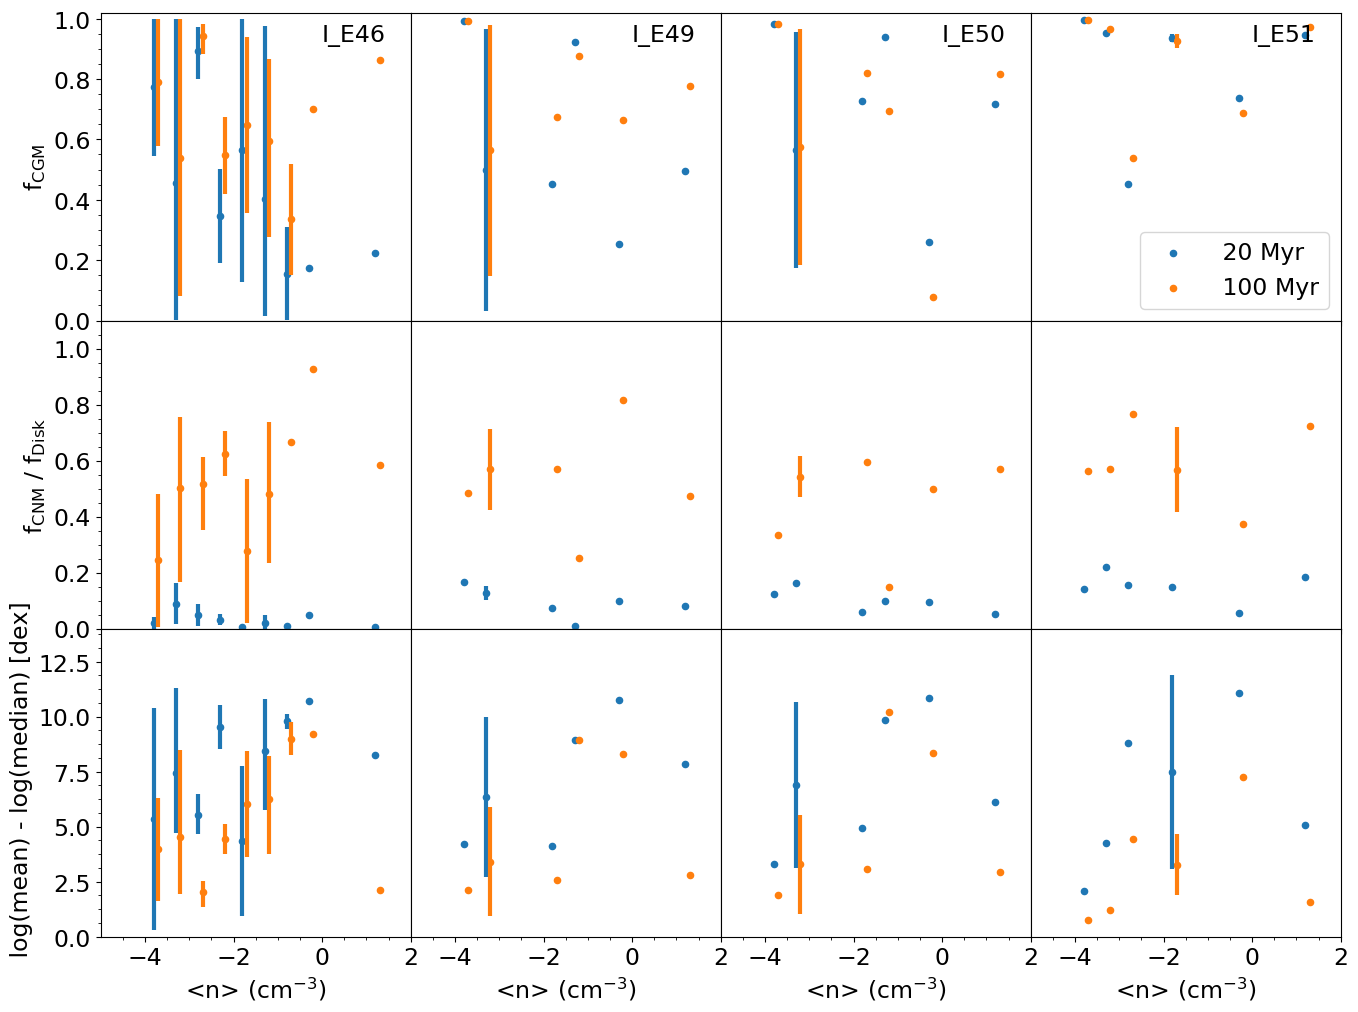

In [18]:

#select  = (event_data[run]['z'] == 0.0) 

runs_to_plot = ['AGB1','NSNS1','NSNS3','SNE1']

fig, all_axes = plt.subplots(3,len(runs_to_plot), sharex=True,sharey=False)
inches=4
fig.set_size_inches(inches*len(runs_to_plot),inches * 3)
fig.subplots_adjust(wspace=0,hspace=0)


#radial_colors = {"0" : 'black', "100" : "C0", "300" : "C1" , "600" : "C2"}
m = 0
for phase,axes in zip(['CGM','CNM','mean-median'],all_axes):

    k = 0
    for ax,run in zip(axes,runs_to_plot):
    
        select = event_data[run]['z'] > -99999  #== 0.0

        tracers = event_data[run]['Element'][select]
        n       = np.log10(event_data[run]['n_m'][select])

        
        if m == 0:
            xy = (0, 0.925)
            ax.annotate(run_label_dict[run], xy, xytext=xy, textcoords = 'data')
        
        for j,plot_time in enumerate([ 20.0,100]):

            yvals     = np.zeros(np.size(n))
            for i,t in enumerate(tracers):
    
                if phase == 'mean-median':
                
                    if run in all_data['CNM'].keys():
                        x,y = _get_plot_values('CNM', run, 'mean-median', t)       
                        func = lambda xval :  np.interp(xval, x, y)
                    
                        yvals[i] = func(plot_time)
                    else:
                        continue
                
                
                else:
                    data = np.genfromtxt('/home/aemerick/work/enzo_runs/mixing_experiment/' + run +\
                                     '/' + t + '_enrichment_evolution.dat', names = True)
    
                    func = lambda x, pname : np.interp(x, data['time'], data[pname])
    
                    if phase in ['CNM','WNM','WIM','HIM']:
                        yvals[i] = func(plot_time,phase) / func(plot_time,'Disk')
                    elif phase == 'CGM':
                        yvals[i] = func(plot_time, phase)
    
            #ax.plot(data['time'],data['CGM'], color = radial_colors["%0.0f"%(r[i])], label = "%.0f"%(r[i]))
    
            l = 0
            num_bins = 14
            min_bin = -5.0
            max_bin =  2.0
            db      = (max_bin - min_bin) / (1.0*num_bins)
            for ibin in np.arange(num_bins):
                
                
                x = min_bin + db * ibin
                
                
                select = (n >= x) * (n < x + db)
                
                if np.size(yvals[select]) == 0:
                    continue
                    
                y = np.average( yvals[select])

                x = x + (j*2 - 1)*0.1*db               
                if l == 0:
                    ax.scatter( x+0.5*db, y, label = " %.0f Myr"%(plot_time), s = 20, color = "C%i"%(j))
                else:
                    ax.scatter( x+0.5*db, y, s = 20, color = "C%i"%(j))
                
                #print run, np.max(yvals[select])
                ax.errorbar(x+0.5*db, y, 
                            yerr = [[y- np.min(yvals[select])], [np.max(yvals[select]) - y]], color = 'C%i'%(j),
                            lw = 3)
                

                l = l + 1
                
        if m == 2:
            ax.set_xlabel(r'<n> (cm$^{-3}$)')

        #ax.set_ylim(1.0E-3,2.0)
             #ax.semilogy()
        ax.set_xlim(-5,2)
    
        if m == 0:
            ax.set_ylim(0,1.02)
        elif m == 1:
            ax.set_ylim(0,1.1)
        if m == 2:
            ax.set_ylim(0,14)

            
    
        if m == 0 and (k == 0):
            ax.set_ylabel(r'f$_{\rm ' + phase + '}$')            
        elif m == 1 and (k == 0):
            ax.set_ylabel(r'f$_{\rm ' + phase + r'}$ / f$_{\rm Disk}$')
        elif m == 2 and (k == 0):
            ax.set_ylabel(r' log(mean) - log(median) [dex]')
    
        if k > 0:
            ax.get_yaxis().set_visible(False)
                

        k = k + 1
        
        plt.minorticks_on()
        #plt.tight_layout()
    
        ax.minorticks_on()
    m = m + 1
    
all_axes[(0,3)].legend(loc='lower right',ncol=1)




fig.savefig("II_n_dependence.png", bbox_inches="tight")


-3.8655678751041602 1.3636495795183228
number in bin  -4.1 11
number in bin  -3.1 5
number in bin  -2.1 14
number in bin  -1.1 6
number in bin  0.9 4
-3.8655678751041602 1.3636495795183228
number in bin  -4.1 11
number in bin  -3.1 5
number in bin  -2.1 14
number in bin  -1.1 6
number in bin  0.9 4
-3.8655678751041602 1.3636495795183228
number in bin  -4.1 11
number in bin  -3.1 5
number in bin  -2.1 14
number in bin  -1.1 6
number in bin  0.9 4
-3.8655678751041602 1.3636495795183228
number in bin  -4.1 11
number in bin  -3.1 5
number in bin  -2.1 14
number in bin  -1.1 6
number in bin  0.9 4


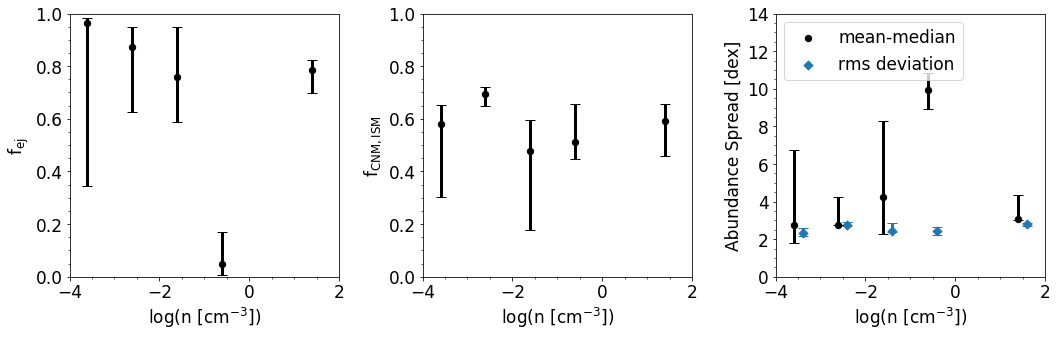

In [146]:

#select  = (event_data[run]['z'] == 0.0) 

runs_to_plot = ['AGB1','NSNS1','NSNS3','SNE1']
average_points = True
fig, all_axes = plt.subplots(1,3) # sharex=True,sharey=False)
inches = 5
fig.set_size_inches(inches*3,inches*1)


#radial_colors = {"0" : 'black', "100" : "C0", "300" : "C1" , "600" : "C2"}
m = 0
for phase,ax in zip(['CGM','CNM','mean-median','rms'],[all_axes[0],all_axes[1],all_axes[2],all_axes[2]]):
    marker = 'o'
    color  = 'black'
    offset = 0.0
    if phase == 'rms':
        marker = 'D'
        color  = 'C0'
        offset = .2
    
    k = 0
    all_yvals = [None]*np.size(runs_to_plot)
    all_xvals = [None]*np.size(runs_to_plot)
    
    for run in runs_to_plot:
    
        select = event_data[run]['z'] > -99999  #== 0.0

        tracers = bytes_to_string(event_data[run]['Element'][select])
        n       = np.log10(event_data[run]['n_m'][select])

        
        #if m == 0:
        #    xy = (0, 0.925)
        #    ax.annotate(run_label_dict[run], xy, xytext=xy, textcoords = 'data')
        
        for j,plot_time in enumerate([ plot_time_scatter]):

            yvals     = np.zeros(np.size(n))
            for i,t in enumerate(tracers):
    
                if phase == 'rms':
                
                    if run in all_data['CNM'].keys():
                        x,y = _get_plot_values('CNM', run, 'rms', t)       
                        func = lambda xval :  np.interp(xval, x, y)                    
                        yvals[i] = func(plot_time)
                        continue   
                        

                    
                elif phase == 'mean-median':
                
                    if run in all_data['CNM'].keys():
                        x,y = _get_plot_values('CNM', run, 'mean-median', t)       
                        func = lambda xval :  np.interp(xval, x, y)                    
                        yvals[i] = func(plot_time)
                    else:
                        continue   
                
                
                else:
                    data = np.genfromtxt('/home/aemerick/work/enzo_runs/mixing_experiment/' + run +\
                                     '/' + t + '_enrichment_evolution.dat', names = True)
    
                    func = lambda x, pname : np.interp(x, data['time'], data[pname])
    
                    if phase in ['CNM','WNM','WIM','HIM']:
                        yvals[i] = func(plot_time,phase) / func(plot_time,'Disk')
                    elif phase == 'CGM':
                        yvals[i] = func(plot_time, phase)
    
            #ax.plot(data['time'],data['CGM'], color = radial_colors["%0.0f"%(r[i])], label = "%.0f"%(r[i]))
    
            if not average_points:
                l = 0
                num_bins = 14
                min_bin = -5.0
                max_bin =  2.0
                db      = (max_bin - min_bin) / (1.0*num_bins)
                for ibin in np.arange(num_bins):
                    x = min_bin + db * ibin      
                    select = (n >= x) * (n < x + db)
                
                    if np.size(yvals[select]) == 0:
                        continue
                    
                    y = np.average( yvals[select])

                    x = x + (j*2 - 1)*0.1*db               
                    if l == 0:
                        ax.scatter( x+0.5*db, y, label = " %.0f Myr"%(plot_time), s = 20, color = "C%i"%(j))
                    else:
                        ax.scatter( x+0.5*db, y, s = 20, color = "C%i"%(j))
                
                    #print run, np.max(yvals[select])
                    ax.errorbar(x+0.5*db, y, 
                                yerr = [[y- np.min(yvals[select])], [np.max(yvals[select]) - y]], color = 'C%i'%(j),
                                lw = 3)
                    l = l + 1

            else:
                all_xvals[k] = 1.0* n
                all_yvals[k] = 1.0* yvals
                

                
        ax.set_xlabel(r'log(n [cm$^{-3}$])')

        #ax.set_ylim(1.0E-3,2.0)
             #ax.semilogy()
        ax.set_xlim(-4,2)
    
        if m == 0:
            ax.set_ylim(0,1.0)
        elif m == 1:
            ax.set_ylim(0,1.)
        if m == 2:
            ax.set_ylim(0,14)

            
    
        if m == 0:
            #ax.set_ylabel(r'f$_{\rm ' + phase + '}$')     
            ax.set_ylabel(r'f$_{\rm ej}$')                        
        elif m == 1:
           # ax.set_ylabel(r'f$_{\rm ' + phase + r'}$ / f$_{\rm Disk}$')
            ax.set_ylabel(r'f$_{\rm ' + phase + r', ISM}$')            
        elif m == 2 or m == 3:
            ax.set_ylabel(r'Abundance Spread [dex]')
        
            if k == 0:
                if m == 2:
                    ax.scatter([-10,-10],[-10,-10], color = color,s = 40, marker=marker,
                               label = 'mean-median')
                elif m == 3:
                    ax.scatter([-10,-10],[-10,-10], color = color,s = 40, marker=marker,
                               label = 'rms deviation')  
    
        #if k > 0:
        #    ax.get_yaxis().set_visible(False)
                

        k = k + 1
        
        plt.minorticks_on()
        plt.tight_layout()
    
        ax.minorticks_on()
        
    if average_points:

        all_xvals = np.concatenate(all_xvals,axis=None)
        all_yvals = np.concatenate(all_yvals,axis=None)
        
                       
        l = 0
        num_bins = 6
        min_bin  = -4.0
        max_bin  =  2.0
        db       = (max_bin - min_bin) / (1.0*num_bins)   
        
       # 
        #ax.scatter(all_xvals, all_yvals, s=20, color = 'C0', marker ='o')
        print(np.min(all_xvals), np.max(all_xvals))
        for ibin in np.arange(num_bins):
            x = min_bin + db * ibin      
            select = (all_xvals >= x) * (all_xvals < x + db)
                
            if np.size(all_yvals[select]) == 0:
                continue
                    
           # y = np.average( all_yvals[select])
            
            y = np.percentile( all_yvals[select], 50)

            x = x + (j*2 - 1)*0.1*db               
            
            ax.scatter( x+0.5*db+offset, y, s = 40, color = color, marker= marker)
            
            print("number in bin ", x, np.size( all_yvals[select]))
            #print run, np.max(yvals[select])
            ax.errorbar(x+0.5*db+offset, y, 
                        yerr = [[y- np.percentile(all_yvals[select],25)], [np.percentile(all_yvals[select],75) - y]], 
                        color = color, capsize = 5,
                        lw = 3)        
            l = l + 1

        
    m = m + 1
    
#all_axes[(0,3)].legend(loc='lower right',ncol=1)

all_axes[2].legend(loc='upper left',ncol=1)#,fancybox=True)

fig.savefig("combined_rms_n_dependence.png", bbox_inches="tight")


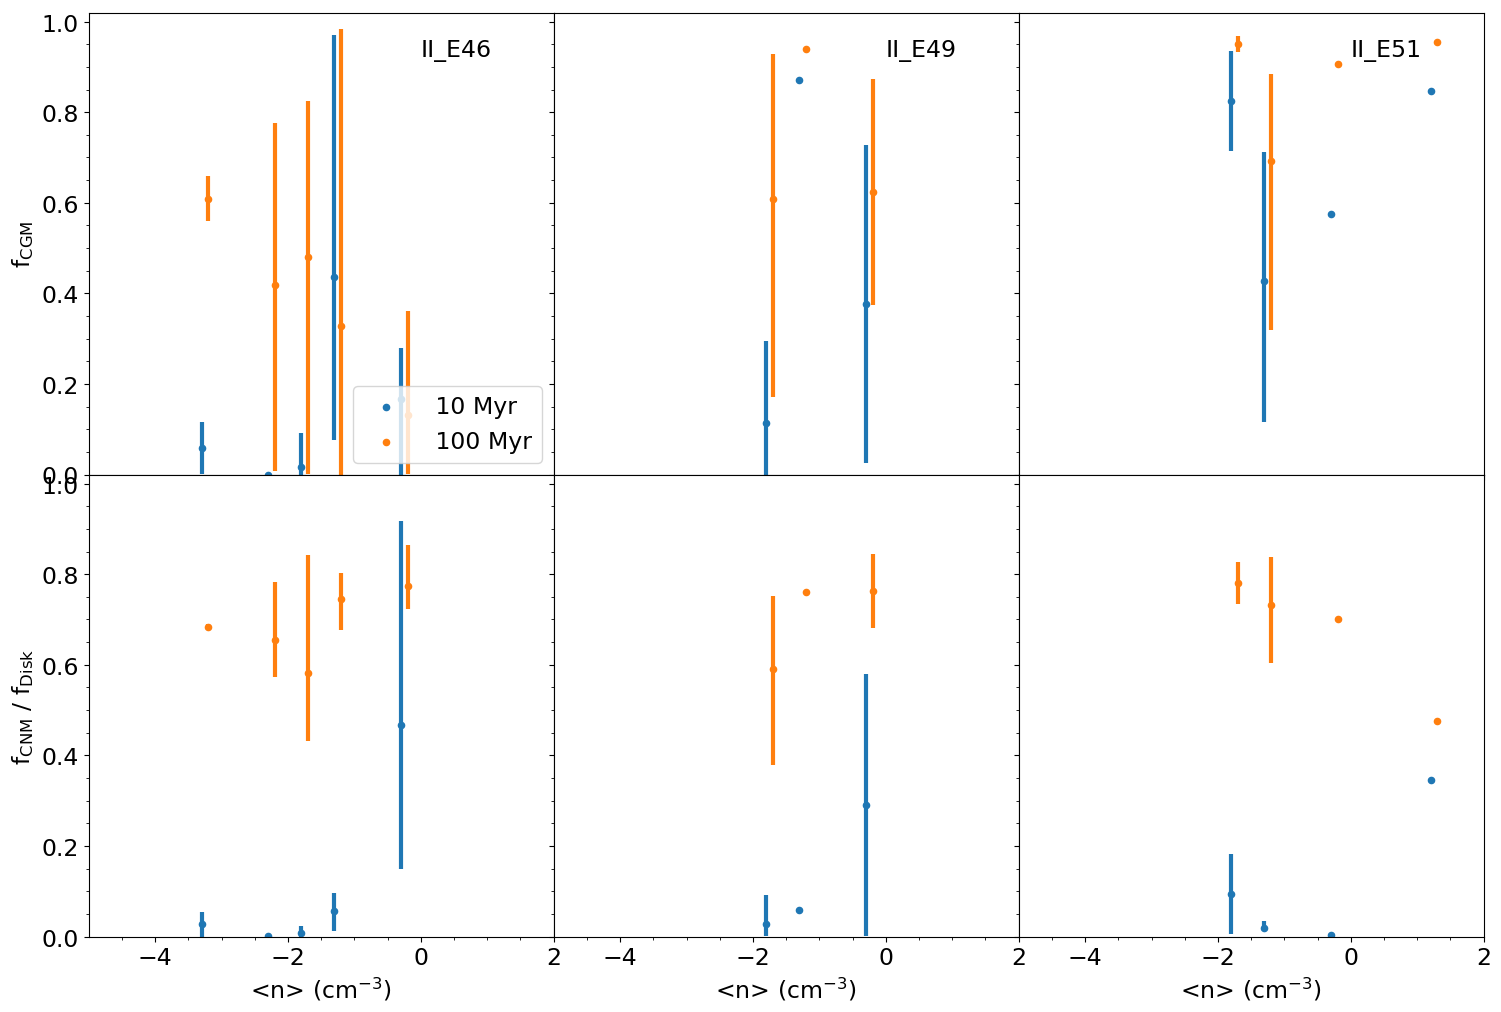

In [12]:

#select  = (event_data[run]['z'] == 0.0) 

runs_to_plot = ['AGB1_400','NSNS1_400','SNE1_400']

fig, all_axes = plt.subplots(2,len(runs_to_plot), sharex=True,sharey=True)
fig.set_size_inches(6*len(runs_to_plot),12)
fig.subplots_adjust(wspace=0,hspace=0)


#radial_colors = {"0" : 'black', "100" : "C0", "300" : "C1" , "600" : "C2"}
m = 0
for phase,axes in zip(['CGM','CNM'],all_axes):

    k = 0
    for ax,run in zip(axes,runs_to_plot):
    
        select = event_data[run]['z'] > -99999  #== 0.0

        tracers = event_data[run]['Element'][select]
        n       = np.log10(event_data[run]['n_m'][select])

        
        if m == 0:
            xy = (0, 0.925)
            ax.annotate(run_label_dict[run], xy, xytext=xy, textcoords = 'data')
        
        for j,plot_time in enumerate([ 10.0,100]):

            yvals     = np.zeros(np.size(n))
            for i,t in enumerate(tracers):
    
                data = np.genfromtxt('/home/aemerick/work/enzo_runs/mixing_experiment/' + run +\
                                 '/' + t + '_enrichment_evolution.dat', names = True)
    
                func = lambda x, pname : np.interp(x, data['time'], data[pname])
    
                if phase in ['CNM','WNM','WIM','HIM']:
                    yvals[i] = func(plot_time,phase) / func(plot_time,'Disk')
                elif phase == 'CGM':
                    yvals[i] = func(plot_time, phase)
    
            #ax.plot(data['time'],data['CGM'], color = radial_colors["%0.0f"%(r[i])], label = "%.0f"%(r[i]))
    
            l = 0
            num_bins = 14
            min_bin = -5.0
            max_bin =  2.0
            db      = (max_bin - min_bin) / (1.0*num_bins)
            for ibin in np.arange(num_bins):
                
                
                x = min_bin + db * ibin
                
                
                select = (n >= x) * (n < x + db)
                
                if np.size(yvals[select]) == 0:
                    continue
                    
                y = np.average( yvals[select])

                x = x + (j*2 - 1)*0.1*db               
                if k == 0 and l == 0:
                    ax.scatter( x+0.5*db, y, label = " %.0f Myr"%(plot_time), s = 20, color = "C%i"%(j))
                else:
                    ax.scatter( x+0.5*db, y, s = 20, color = "C%i"%(j))
                
                #print run, np.max(yvals[select])
                ax.errorbar(x+0.5*db, y, 
                            yerr = [[y- np.min(yvals[select])], [np.max(yvals[select]) - y]], color = 'C%i'%(j),
                            lw = 3)
                

                l = l + 1
                
        if m == 1:
            ax.set_xlabel(r'<n> (cm$^{-3}$)')
        
        if m == 0 and (k == 0):
            ax.set_ylabel(r'f$_{\rm ' + phase + '}$')
        elif m == 1 and (k == 0):
            ax.set_ylabel(r'f$_{\rm ' + phase + r'}$ / f$_{\rm Disk}$')
            
        ax.set_ylim(0,1.02)
        #ax.set_ylim(1.0E-3,2.0)
             #ax.semilogy()
        ax.set_xlim(-5,2)
    
        k = k + 1
        
        plt.minorticks_on()
        #plt.tight_layout()
    
        ax.minorticks_on()
    m = m + 1
all_axes[(0,0)].legend(loc='lower right',ncol=1)




fig.savefig("III_n_dependence.png")


AGB1 [-5.69897 -5.69897 -5.69897 -5.69897 -5.69897 -5.69897 -5.69897 -5.69897
 -5.69897 -5.69897 -5.69897 -5.69897 -5.69897]
NSNS1 [-2. -2. -2. -2. -2. -2. -2.]
NSNS3 [-1. -1. -1. -1. -1. -1. -1.]
SNE1 [0. 0. 0. 0. 0. 0. 0.]
HNE1 [1. 1.]
HNE2 [1. 1.]
AGB1 [-5.69897 -5.69897 -5.69897 -5.69897 -5.69897 -5.69897 -5.69897 -5.69897
 -5.69897 -5.69897 -5.69897 -5.69897 -5.69897]
NSNS1 [-2. -2. -2. -2. -2. -2. -2.]
NSNS3 [-1. -1. -1. -1. -1. -1. -1.]
SNE1 [0. 0. 0. 0. 0. 0. 0.]
HNE1 [1. 1.]
HNE2 [1. 1.]
AGB1 [-5.69897 -5.69897 -5.69897 -5.69897 -5.69897 -5.69897 -5.69897 -5.69897
 -5.69897 -5.69897 -5.69897 -5.69897 -5.69897]
NSNS1 [-2. -2. -2. -2. -2. -2. -2.]
NSNS3 [-1. -1. -1. -1. -1. -1. -1.]
SNE1 [0. 0. 0. 0. 0. 0. 0.]
HNE1 [1. 1.]
HNE2 [1. 1.]


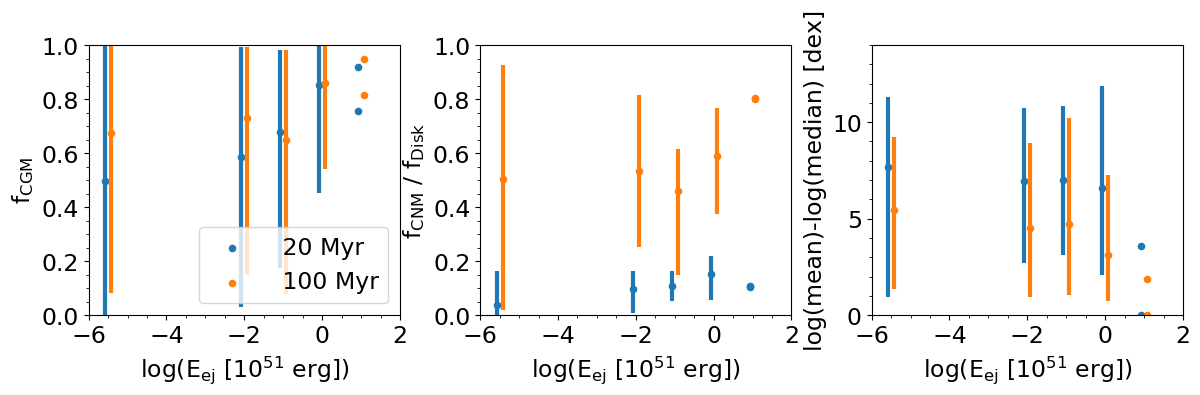

In [21]:
run = 'AGB1'

#select  = (event_data[run]['z'] == 0.0) 


fig, axes = plt.subplots(1,3)
fig.set_size_inches(12,4)


#radial_colors = {"0" : 'black', "100" : "C0", "300" : "C1" , "600" : "C2"}
m = 0
for ax,phase in zip(axes,['CGM','CNM','mean-median']):

    for k,run in enumerate(['AGB1','NSNS1','NSNS3','SNE1','HNE1','HNE2']):

        select = event_data[run]['z'] == 0.0
    
        tracers = event_data[run]['Element'][select]
        E       = np.log10(event_data[run]['E51'][select])
        print run, E
        for j,plot_time in enumerate([20.0, 100.0]):

            yvals     = np.zeros(np.size(E))
            for i,t in enumerate(tracers):
                
                if phase == 'mean-median':
                
                    if run in all_data['CNM'].keys():
                        x,y = _get_plot_values('CNM', run, 'mean-median', t)       
                        func = lambda xval :  np.interp(xval, x, y)
                    
                        yvals[i] = func(plot_time)
                    else:
                        continue
                
                
                else:                
    
                    data = np.genfromtxt('/home/aemerick/work/enzo_runs/mixing_experiment/' + run +\
                                     '/' + t + '_enrichment_evolution.dat', names = True)
    
                    func = lambda x, phase : np.interp(x, data['time'], data[phase])
    
                    if phase == 'CGM':
                        yvals[i] = func(plot_time,phase)
                    else:
                        yvals[i] = func(plot_time,phase) / func(plot_time,'Disk')
    
            #ax.plot(data['time'],data['CGM'], color = radial_colors["%0.0f"%(r[i])], label = "%.0f"%(r[i]))
            l = 0
            
            min_bin = -6.25
            max_bin =  2.25
            db      =  0.5
            num_bins = (max_bin - min_bin) / db
            for ibin in np.arange(num_bins):
                
                
                x = min_bin + db * ibin
                
                
                select = (E >= x) * (E < x + db)
                
                if np.size(yvals[select]) == 0:
                    continue
                    
                y = np.average( yvals[select])

                x = x + (j*2 - 1)*0.15*db               
         
                if k == 0 and l == 0:
                    ax.scatter( x+0.5*db, y, label = " %.0f Myr"%(plot_time), s = 20, color = "C%i"%(j))
                else:
                    ax.scatter( x+0.5*db, y, s = 20, color = "C%i"%(j))
                
                    #print run, np.max(yvals[select])
                ax.errorbar(x+0.5*db, y, 
                            yerr = [[y- np.min(yvals[select])], [np.max(yvals[select]) - y]], color = 'C%i'%(j),
                            lw = 3)
                

                l = l + 1  

        ax.set_xlabel(r'log(E$_{\rm ej}$ [10$^{51}$ erg])')
        if m < 2:
            ax.set_ylim(0,1.0)
        elif m == 2:
            ax.set_ylim(0,14.0)
            
        ax.set_xlim(-6, 2)

        ax.minorticks_on()
        plt.tight_layout()
    m = m + 1
plt.tight_layout()        
        #ax.semilogx()

        
axes[0].legend(loc='lower right',ncol=1)
axes[0].set_ylabel(r'f$_{\rm CGM}$')
axes[1].set_ylabel(r'f$_{\rm CNM}$ / f$_{\rm Disk}$')
axes[2].set_ylabel(r'log(mean)-log(median) [dex]')
    
fig.savefig("II_Eej_CNM_avg.png",bbox_inches="tight")
    

[-5.69897 -5.69897 -5.69897 -5.69897 -5.69897 -5.69897 -5.69897 -5.69897
 -5.69897 -5.69897 -5.69897 -5.69897 -5.69897] AGB1
[-2. -2. -2. -2. -2. -2. -2.] NSNS1
[-1. -1. -1. -1. -1. -1. -1.] NSNS3
[0. 0. 0. 0. 0. 0. 0.] SNE1
[1. 1.] HNE1
[1. 1.] HNE2
[-5.69897 -5.69897 -5.69897 -5.69897 -5.69897 -5.69897 -5.69897 -5.69897
 -5.69897 -5.69897 -5.69897 -5.69897 -5.69897] AGB1
[-2. -2. -2. -2. -2. -2. -2.] NSNS1
[-1. -1. -1. -1. -1. -1. -1.] NSNS3
[0. 0. 0. 0. 0. 0. 0.] SNE1
[1. 1.] HNE1
[1. 1.] HNE2
[-5.69897 -5.69897 -5.69897 -5.69897 -5.69897 -5.69897 -5.69897 -5.69897
 -5.69897 -5.69897 -5.69897 -5.69897 -5.69897] AGB1
[-2. -2. -2. -2. -2. -2. -2.] NSNS1
[-1. -1. -1. -1. -1. -1. -1.] NSNS3
[0. 0. 0. 0. 0. 0. 0.] SNE1
[1. 1.] HNE1
[1. 1.] HNE2
[-5.69897 -5.69897 -5.69897 -5.69897 -5.69897 -5.69897 -5.69897 -5.69897
 -5.69897 -5.69897 -5.69897 -5.69897 -5.69897] AGB1
AGB1 -5.825 2.753220774360047
[-2. -2. -2. -2. -2. -2. -2.] NSNS1
NSNS1 -2.325 2.4035344757527226
[-1. -1. -1. -1. -1. -1.

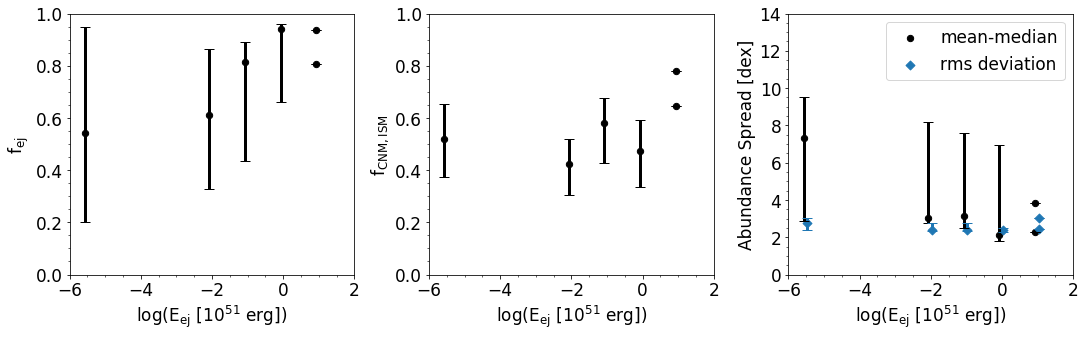

In [148]:
run = 'AGB1'

#select  = (event_data[run]['z'] == 0.0) 


# maybe final
average_points = True
fig, axes = plt.subplots(1,3) # sharex=True,sharey=False)
inches = 5
fig.set_size_inches(inches*3,inches*1)


#radial_colors = {"0" : 'black', "100" : "C0", "300" : "C1" , "600" : "C2"}
m = 0
for ax,phase in zip([axes[0],axes[1],axes[2],axes[2]],['CGM','CNM','mean-median','rms']):
    marker = 'o'
    color  = 'black'
    offset = 0.0
    if phase == 'rms':
        marker = 'D'
        color  = 'C0'
        offset = 0.1
    
    for k,run in enumerate(['AGB1','NSNS1','NSNS3','SNE1','HNE1','HNE2']):

        select = event_data[run]['z'] == 0.0
    
        tracers = bytes_to_string(event_data[run]['Element'][select])
        E       = np.log10(event_data[run]['E51'][select])
        
        
        print(E,run)
        
        for j,plot_time in enumerate([plot_time_scatter]):

            yvals     = np.zeros(np.size(E))
            for i,t in enumerate(tracers):
                
                if phase == 'rms':
                
                    if run in all_data['CNM'].keys():
                        x,y = _get_plot_values('CNM', run, 'rms', t)       
                        func = lambda xval :  np.interp(xval, x, y)                    
                        yvals[i] = func(plot_time)
                        continue   
                        

                    
                elif phase == 'mean-median':
                
                    if run in all_data['CNM'].keys():
                        x,y = _get_plot_values('CNM', run, 'mean-median', t)       
                        func = lambda xval :  np.interp(xval, x, y)                    
                        yvals[i] = func(plot_time)
                    else:
                        continue   
                
                else:                
    
                    data = np.genfromtxt('/home/aemerick/work/enzo_runs/mixing_experiment/' + run +\
                                     '/' + t + '_enrichment_evolution.dat', names = True)
    
                    func = lambda x, phase : np.interp(x, data['time'], data[phase])
    
                    if phase == 'CGM':
                        yvals[i] = func(plot_time,phase)
                    else:
                        yvals[i] = func(plot_time,phase) / func(plot_time,'Disk')
    
            #ax.plot(data['time'],data['CGM'], color = radial_colors["%0.0f"%(r[i])], label = "%.0f"%(r[i]))
            l = 0
            
            min_bin = -6.25
            max_bin =  2.25
            db      =  0.5
            num_bins = (max_bin - min_bin) / db
            for ibin in np.arange(num_bins):
                
                
                x = min_bin + db * ibin
                
                
                select = (E >= x) * (E < x + db)
                
                if np.size(yvals[select]) == 0:
                    continue
                    
                #y = np.average( yvals[select])
                y = np.percentile(yvals[select],50)
                
                x = x + (j*2 - 1)*0.15*db               

                ax.scatter( x+0.5*db+offset, y, marker = marker, s = 40, color = color) # = "C%i"%(j))
                #print(run, "number of points", np.size(yvals[select]))
                    #print run, np.max(yvals[select])
                ax.errorbar(x+0.5*db+offset, y, 
                            yerr = [[y- np.percentile(yvals[select],25)], [np.percentile(yvals[select],75) - y]], 
                            color = color,
                            #color = 'C%i'%(j),
                            lw = 3, capsize = 5)
                
                if phase == 'rms':
                    print(run,x,y)
                

                l = l + 1  

        ax.set_xlabel(r'log(E$_{\rm ej}$ [10$^{51}$ erg])')
        if m < 2:
            ax.set_ylim(0,1.0)
        elif m == 2 or m == 3:
            ax.set_ylim(0.0,14.0)
            ax.set_ylabel(r'Abundance Spread [dex]')
        
            if k == 0:
                if m == 2:
                    ax.scatter([-10,-10],[-10,-10], color = color,s = 40, marker=marker,
                               label = 'mean-median')
                elif m == 3:
                    ax.scatter([-10,-10],[-10,-10], color = color,s = 40, marker=marker,
                               label = 'rms deviation')  
    
            
        ax.set_xlim(-6, 2)

        ax.minorticks_on()
        plt.tight_layout()
    m = m + 1
plt.tight_layout()        
        #ax.semilogx()

        
#axes[0].legend(loc='lower right',ncol=1)
axes[0].set_ylabel(r'f$_{\rm ej}$')
axes[1].set_ylabel(r'f$_{\rm CNM, ISM}$')
axes[2].set_ylabel(r'Abundance Spread [dex]')
axes[2].legend(loc='best')
fig.savefig("combined_rms_Eej_CNM_avg.png",bbox_inches="tight")
    

['C' 'Na' 'Mg' 'Fe' 'Ni' 'O' 'Si' 'Mn' 'As' 'N' 'S' 'Ca' 'Sr']


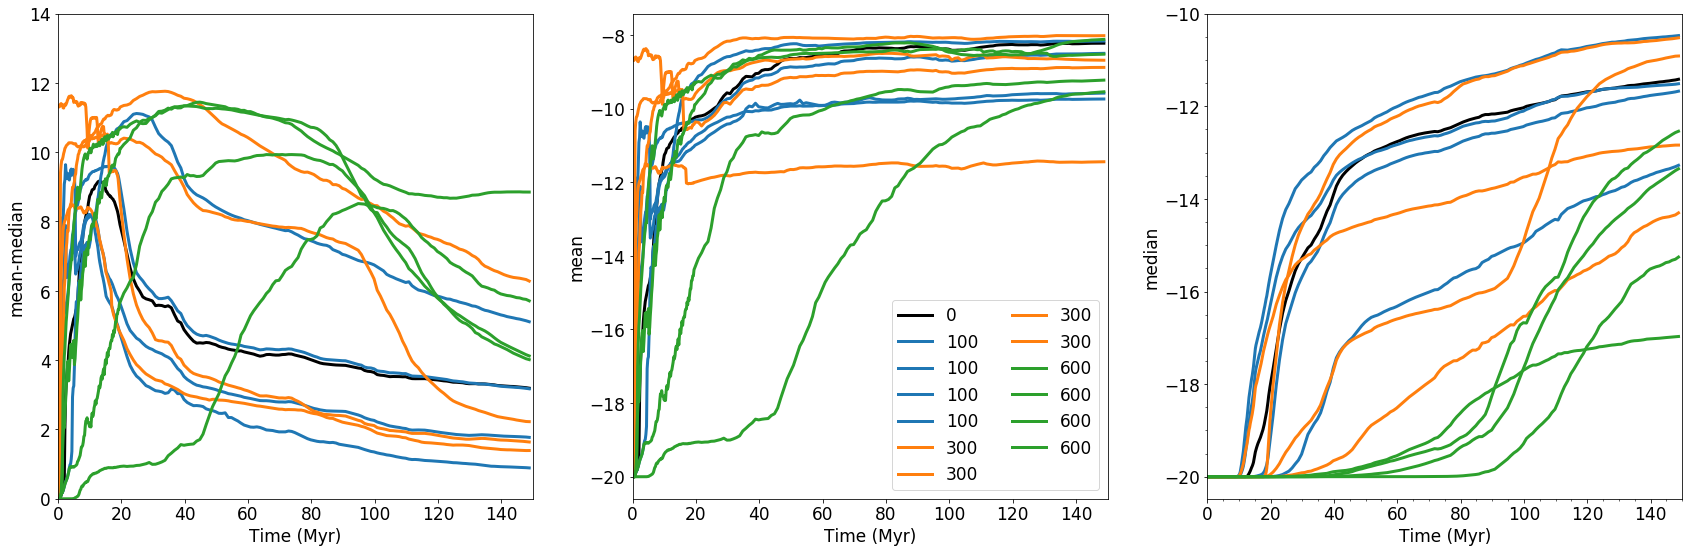

In [23]:
#
#
#
# Now I want to plot f_ej 
#
#

# gather which tracers are at the desired r or z 
#
# pick any r, only midplane though
#
run = 'AGB1'

select  = event_data[run]['z'] == 0.0
tracers = event_data[run]['Element'][select]
r       = event_data[run]['r_cyl'][select]

tracers = tracers[np.argsort(r)]
r       = r[np.argsort(r)]


print tracers

# plot evolution?
fig, ax = plt.subplots(1,3)
fig.set_size_inches(24,8)

radial_ls = ['-','-.','--',':']
radial_colors = {"0" : 'black', "100" : "C0", "300" : "C1" , "600" : "C2"}


for i,e in enumerate(tracers):
    
    color = radial_colors["%.0f"%(r[i])]
    if r[i] > 0:
        ls    = radial_ls[i%4]
    else:
        ls = '-'
    #viridis( i / (1.0*np.size(tracers)))
    
    stat = 'mean-median'
    x,y = _get_plot_values('CNM', run, stat, e)
    ax[0].plot(x,y,lw = 3,label = "%.1f"%(r[i]),  color = color)
    ax[0].set_ylabel(stat)
    
    stat = 'mean'
    x,y = _get_plot_values('CNM', run, stat, e)       
    ax[1].plot(x,y,lw=3, color = color, label = "%.0f"%(r[i]))
    ax[1].set_ylabel(stat)

    stat = 'median'
    x,y = _get_plot_values('CNM', run, stat, e)        
    ax[2].plot(x,y,lw=3,color = color)
    ax[2].set_ylabel(stat)
    
for a in ax:
    a.set_xlabel('Time (Myr)')
    a.set_xlim(0,150.0)
ax[0].set_ylim(0,14)
#ax[1].set_ylim()

ax[1].legend(loc='best', ncol = 2)
#ax
plt.minorticks_on()
plt.tight_layout()

['C' 'Na' 'Mg' 'Fe' 'Ni' 'O' 'Si' 'Mn' 'As' 'N' 'S' 'Ca' 'Sr']


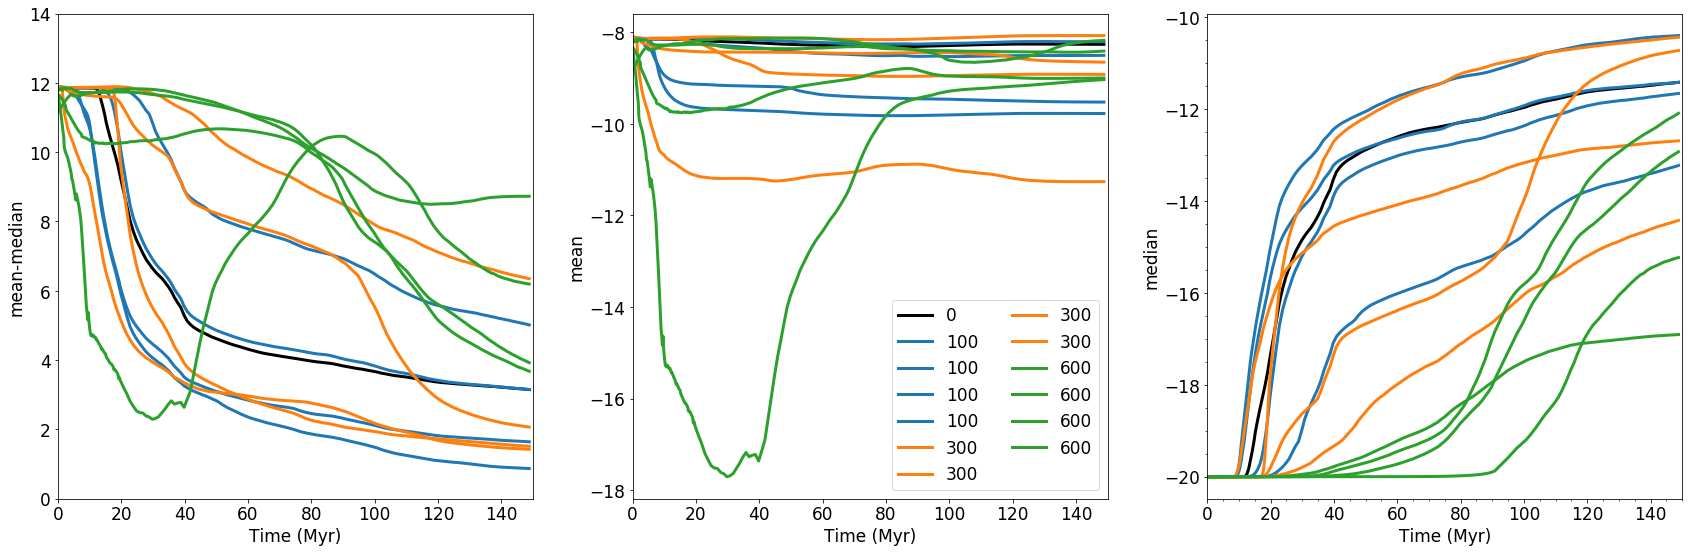

In [24]:
#
#
#
# Now I want to plot f_ej 
#
#

# gather which tracers are at the desired r or z 
#
# pick any r, only midplane though
#
run = 'AGB1'

select  = event_data[run]['z'] == 0.0
tracers = event_data[run]['Element'][select]
r       = event_data[run]['r_cyl'][select]

tracers = tracers[np.argsort(r)]
r       = r[np.argsort(r)]


print tracers

# plot evolution?
fig, ax = plt.subplots(1,3)
fig.set_size_inches(24,8)

radial_ls = ['-','-.','--',':']
radial_colors = {"0" : 'black', "100" : "C0", "300" : "C1" , "600" : "C2"}


for i,e in enumerate(tracers):
    
    color = radial_colors["%.0f"%(r[i])]
    if r[i] > 0:
        ls    = radial_ls[i%4]
    else:
        ls = '-'
    #viridis( i / (1.0*np.size(tracers)))
    
    stat = 'mean-median'
    phase = 'Disk'
    x,y = _get_plot_values(phase, run, stat, e)
    ax[0].plot(x,y,lw = 3,label = "%.1f"%(r[i]),  color = color)
    ax[0].set_ylabel(stat)
    
    stat = 'mean'
    x,y = _get_plot_values(phase, run, stat, e)       
    ax[1].plot(x,y,lw=3, color = color, label = "%.0f"%(r[i]))
    ax[1].set_ylabel(stat)

    stat = 'median'
    x,y = _get_plot_values(phase, run, stat, e)        
    ax[2].plot(x,y,lw=3,color = color)
    ax[2].set_ylabel(stat)
    
for a in ax:
    a.set_xlabel('Time (Myr)')
    a.set_xlim(0,150.0)
ax[0].set_ylim(0,14)
#ax[1].set_ylim()

ax[1].legend(loc='best', ncol = 2)
#ax
plt.minorticks_on()
plt.tight_layout()

In [ ]:
print all_data['CNM']['AGB1'].keys()

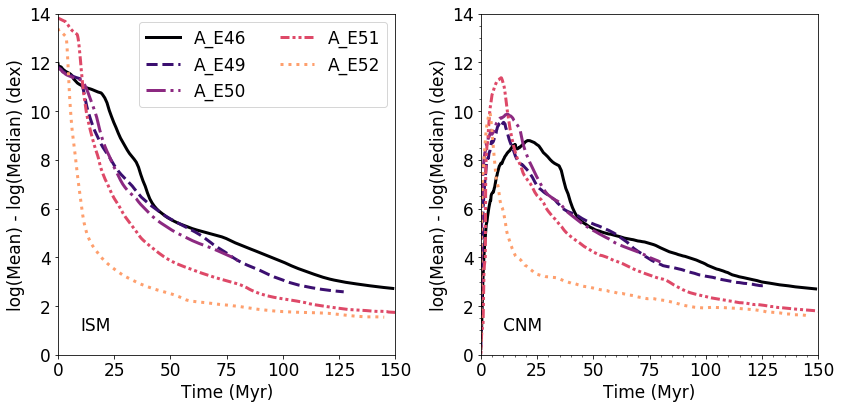

In [100]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(12,6)
lines = {'AGB1' : '-', 'NSNS1' : '--', 'NSNS3' : '-.', 'SNE1' : (0,(3,1,1,1,1,1)) , 'HNE1' : ':'}
labels = {'AGB1' : 'A_E46', 'NSNS1' : 'A_E49' , 'NSNS3' : 'A_E50', 'SNE1' : 'A_E51', 'HNE1' : 'A_E52'}

plot_runs = ['AGB1','NSNS1','NSNS3','SNE1', 'HNE1']

for run in plot_runs:
    x,y = _get_plot_values('Disk', run, 'mean-median', 'average')
    # fudge the very initial values of the plot... these can be a bit screwy because
    # of a bug in the abundance calculator. It doesn't handle abundances right at
    # the initial tiny number abundances well (need to fix) which only impacts the 
    # the first Myrs after the initial enrichment. Does fine once cells have some
    # non-zero amount of metals (even if still super small). This is an aesthetic 
    # fix to not have to re-run the whole abundance analysis again. 
    y[:np.argmax(y)] = np.max(y) * np.linspace(1.01,1.0000, np.argmax(y))
    ax[0].plot(x, y, color = run_color_dict[run], lw = 3, ls = lines[run], label = labels[run])
    
# average the two HNE's
#x,y    = _get_plot_values('Disk','HNE1','mean-median','average')
#x2,y2  = _get_plot_values('Disk','HNE2','mean-median','average')
#print(np.min(x),np.max(x),np.min(x2),np.max(x2))

#ax[0].plot(x,y,color='C0',lw=1,ls='""')
#ax[0].plot(x2,y2,color='C0',lw=1,ls=':')

    
for run in plot_runs:
    x,y = _get_plot_values('CNM', run, 'mean-median', 'average')
    ax[1].plot(x, y, color = run_color_dict[run], lw = 3, ls = lines[run], label = labels[run])

for a in ax:
    a.set_xlim(0,150.0)
    a.set_ylim(0,14)
    a.set_ylabel(r'log(Mean) - log(Median) (dex)')
    a.set_xlabel(r'Time (Myr)')

ax[0].legend(ncol=2)
plt.minorticks_on()
plt.tight_layout()

ax[0].annotate("ISM", xy = (10,1), xycoords = 'data')
ax[1].annotate("CNM", xy = (10,1), xycoords = 'data')


fig.savefig("ISM_CNM_average_mean-median.png")

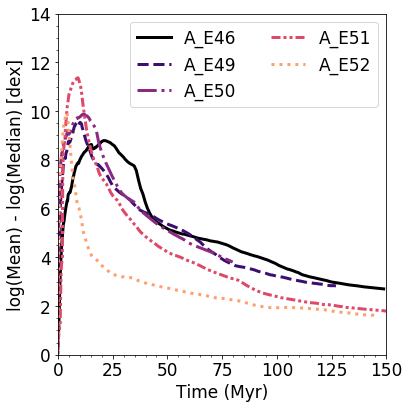

In [44]:
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
lines = {'AGB1' : '-', 'NSNS1' : '--', 'NSNS3' : '-.', 'SNE1' : (0,(3,1,1,1,1,1)) , 'HNE1' : ':'}
labels = {'AGB1' : 'A_E46', 'NSNS1' : 'A_E49' , 'NSNS3' : 'A_E50', 'SNE1' : 'A_E51', 'HNE1' : 'A_E52'}

plot_runs = ['AGB1','NSNS1','NSNS3','SNE1', 'HNE1']
    
for run in plot_runs:
    x,y = _get_plot_values('CNM', run, 'mean-median', 'average')
    ax.plot(x, y, color = run_color_dict[run], lw = 3, ls = lines[run], label = labels[run])

#for a in ax:
ax.set_xlim(0,150.0)
ax.set_ylim(0,14)
ax.set_ylabel(r'log(Mean) - log(Median) [dex]')
ax.set_xlabel(r'Time (Myr)')

ax.legend(ncol=2)
plt.minorticks_on()
plt.tight_layout()

#ax[0].annotate("ISM", xy = (10,1), xycoords = 'data')
#ax.annotate("CNM-only", xy = (10,1), xycoords = 'data')


fig.savefig("CNM_average_mean-median.png")

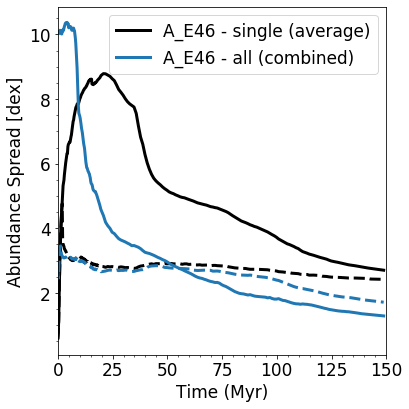

In [164]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(6,6)
lines = {'AGB1' : '-', 'NSNS1' : '--', 'NSNS3' : '-.', 'SNE1' : (0,(3,1,1,1,1,1)) , 'HNE1' : ':'}
labels = {'AGB1' : 'I_E46', 'NSNS1' : 'I_E49' , 'NSNS3' : 'I_E50', 'SNE1' : 'I_E51', 'HNE1' : 'I_E52'}

plot_runs = ['AGB1']



for run in plot_runs:
    x,y = _get_plot_values('CNM', run, 'mean-median', 'average')
    # fudge the very initial values of the plot... these can be a bit screwy because
    # of a bug in the abundance calculator. It doesn't handle abundances right at
    # the initial tiny number abundances well (need to fix) which only impacts the 
    # the first Myrs after the initial enrichment. Does fine once cells have some
    # non-zero amount of metals (even if still super small). This is an aesthetic 
    # fix to not have to re-run the whole abundance analysis again. 
   # y[:np.argmax(y)] = np.max(y) * np.linspace(1.01,1.0000, np.argmax(y))
    ax.plot(x, y, color = 'black', lw = 3, ls = lines[run], label = "A_E46 - single (average)")

    x,y = _get_plot_values('CNM', run, 'rms', 'average')
    ax.plot(x, y, color = 'black', lw = 3, ls = '--') #lines[run]) #, label = "A_E46 - single (average)")    


    
for run in plot_runs:
    x,y = _get_plot_values('CNM', run, 'mean-median', 'combined')
    # fudge the very initial values of the plot... these can be a bit screwy because
    # of a bug in the abundance calculator. It doesn't handle abundances right at
    # the initial tiny number abundances well (need to fix) which only impacts the 
    # the first Myrs after the initial enrichment. Does fine once cells have some
    # non-zero amount of metals (even if still super small). This is an aesthetic 
    # fix to not have to re-run the whole abundance analysis again. 
   # y[:np.argmax(y)] = np.max(y) * np.linspace(1.01,1.0000, np.argmax(y))
    ax.plot(x, y, color = 'C0', lw = 3, ls = lines[run], label = "A_E46 - all (combined)")
    
    x,y = _get_plot_values('CNM', run, 'rms', 'combined')
    ax.plot(x, y, color = 'C0', lw = 3, ls = '--') #lines[run]) #, label = "A_E46 - single (average)") 
    
ax.set_xlim(0,150.0)
#ax.set_ylim(0,14)
ax.set_ylabel(r'Abundance Spread [dex]')
ax.set_xlabel(r'Time (Myr)')

ax.legend(ncol=1)
plt.minorticks_on()
plt.tight_layout()

#ax.annotate("ISM", xy = (10,1), xycoords = 'data')
#ax.annotate("CNM", xy = (10,1), xycoords = 'data')


fig.savefig("combined_mean-median.png")

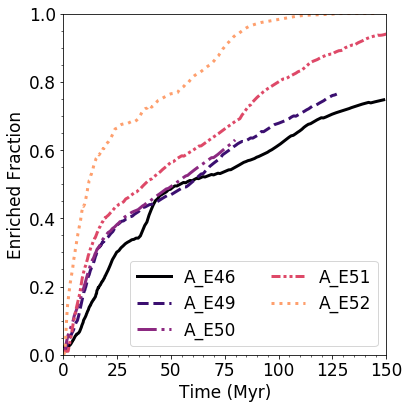

In [155]:
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
lines = {'AGB1' : '-', 'NSNS1' : '--', 'NSNS3' : '-.', 'SNE1' : (0,(3,1,1,1,1,1)) , 'HNE1' : ':'}
labels = {'AGB1' : 'A_E46', 'NSNS1' : 'A_E49' , 'NSNS3' : 'A_E50', 'SNE1' : 'A_E51', 'HNE1' : 'A_E52'}

plot_runs = ['AGB1','NSNS1','NSNS3','SNE1', 'HNE1']
    
for run in plot_runs:
    x,y = _get_plot_values('CNM', run, 'enriched_fraction', 'average')
    
    
  #  y[:np.argmin(y)] = np.min(y) * np.linspace(0.99,1.0000, np.argmin(y))
    
    ax.plot(x, y, color = run_color_dict[run], lw = 3, ls = lines[run], label = labels[run])

#for a in ax:
ax.set_xlim(0,150.0)
ax.set_ylim(0,1.0)
#ax.semilogy()
ax.set_ylabel(r'Enriched Fraction')
ax.set_xlabel(r'Time (Myr)')

ax.legend(ncol=2)
plt.minorticks_on()
plt.tight_layout()

#ax[0].annotate("ISM", xy = (10,1), xycoords = 'data')
#ax.annotate("CNM-only", xy = (10,1), xycoords = 'data')
fig.savefig("CNM_enriched.png")

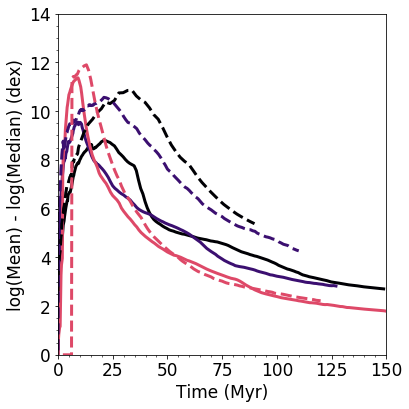

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
lines = {'AGB1_400' : '-', 'NSNS1_400' : '--', 'NSNS3' : '-.', 'SNE1_400' : (0,(3,1,1,1,1,1)) , 'HNE1' : ':'}
labels = {'AGB1_400' : 'B_E46', 'NSNS1_400' : 'B_E49' , 'NSNS3' : 'A_E50', 'SNE1_400' : 'B_E51', 'HNE1' : 'A_E52'}

lines['AGB1'] = '-' #['AGB1_400']
lines['SNE1'] = '-'
lines['NSNS1'] = '-'
lines['AGB1_400'] = '--' #['AGB1_400']
lines['SNE1_400'] = '--'
lines['NSNS1_400'] = '--'

labels['AGB1'] = 'A_E46'
labels['NSNS1'] = 'A_E49'
labels['SNE1']  = 'A_E51'



#plot_runs =#['AGB1_400',
plot_runs =  ['AGB1','NSNS1','SNE1','AGB1_400','NSNS1_400','SNE1_400']

color_dict['A']  = "#1b9e77"
color_dict['B'] = "#7570b3"


run_color_dict['AGB1_400'] = run_color_dict['AGB1']
run_color_dict['NSNS1_400'] = run_color_dict['NSNS1']

run_color_dict['SNE1_400'] = run_color_dict['SNE1']


for run in plot_runs:
    
    run_type = labels[run].split('_')[0]
    
    x,y = _get_plot_values('CNM', run, 'mean-median', 'average')
    ax.plot(x, y, color = run_color_dict[run],
            # color_dict[run_type],
            lw = 3, ls = lines[run], label = labels[run])
    
#for run in plot_runs:
#    x,y = _get_plot_values('CNM', run, 'mean-median', 'average')
#    ax[1].plot(x, y, color = color_dict['CNM'], lw = 3, ls = lines[run], label = labels[run])

#for a in ax:
ax.set_xlim(0,150.0)
ax.set_ylim(0,14)
ax.set_ylabel(r'log(Mean) - log(Median) (dex)')
ax.set_xlabel(r'Time (Myr)')

#ax.legend(ncol=2)
plt.minorticks_on()
plt.tight_layout()

#ax.annotate("ISM", xy = (10,1), xycoords = 'data')
#ax.annotate("CNM", xy = (10,1), xycoords = 'data')


fig.savefig("combined_CNM_average_mean-median.png")

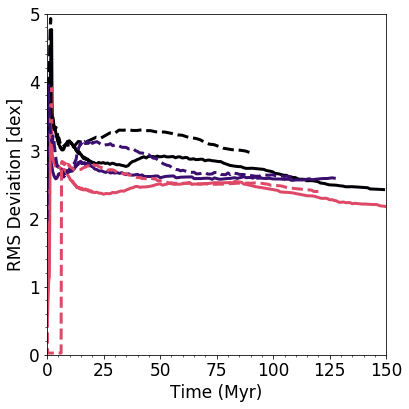

In [43]:
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
lines = {'AGB1_400' : '-', 'NSNS1_400' : '--', 'NSNS3' : '-.', 'SNE1_400' : (0,(3,1,1,1,1,1)) , 'HNE1' : ':'}
labels = {'AGB1_400' : 'B_E46', 'NSNS1_400' : 'B_E49' , 'NSNS3' : 'A_E50', 'SNE1_400' : 'B_E51', 'HNE1' : 'A_E52'}

lines['AGB1'] = '-' #['AGB1_400']
lines['SNE1'] = '-'
lines['NSNS1'] = '-'
lines['AGB1_400'] = '--' #['AGB1_400']
lines['SNE1_400'] = '--'
lines['NSNS1_400'] = '--'

labels['AGB1'] = 'A_E46'
labels['NSNS1'] = 'A_E49'
labels['SNE1']  = 'A_E51'



#plot_runs =#['AGB1_400',
plot_runs =  ['AGB1','NSNS1','SNE1','AGB1_400','NSNS1_400','SNE1_400']

color_dict['A']  = "#1b9e77"
color_dict['B'] = "#7570b3"


run_color_dict['AGB1_400'] = run_color_dict['AGB1']
run_color_dict['NSNS1_400'] = run_color_dict['NSNS1']

run_color_dict['SNE1_400'] = run_color_dict['SNE1']


for run in plot_runs:
    
    run_type = labels[run].split('_')[0]
    
    x,y = _get_plot_values('CNM', run, 'rms', 'average')
    ax.plot(x, y, color = run_color_dict[run],
            # color_dict[run_type],
            lw = 3, ls = lines[run], label = labels[run])
    
#for run in plot_runs:
#    x,y = _get_plot_values('CNM', run, 'mean-median', 'average')
#    ax[1].plot(x, y, color = color_dict['CNM'], lw = 3, ls = lines[run], label = labels[run])

#for a in ax:
ax.set_xlim(0,150.0)
ax.set_ylim(0,5)
ax.set_ylabel(r'RMS Deviation [dex]')
ax.set_xlabel(r'Time (Myr)')

#ax.legend(ncol=2)
plt.minorticks_on()
plt.tight_layout()

#ax.annotate("ISM", xy = (10,1), xycoords = 'data')
#ax.annotate("CNM", xy = (10,1), xycoords = 'data')


fig.savefig("combined_CNM_average_rms.png")

KeyError: 'AGB1'

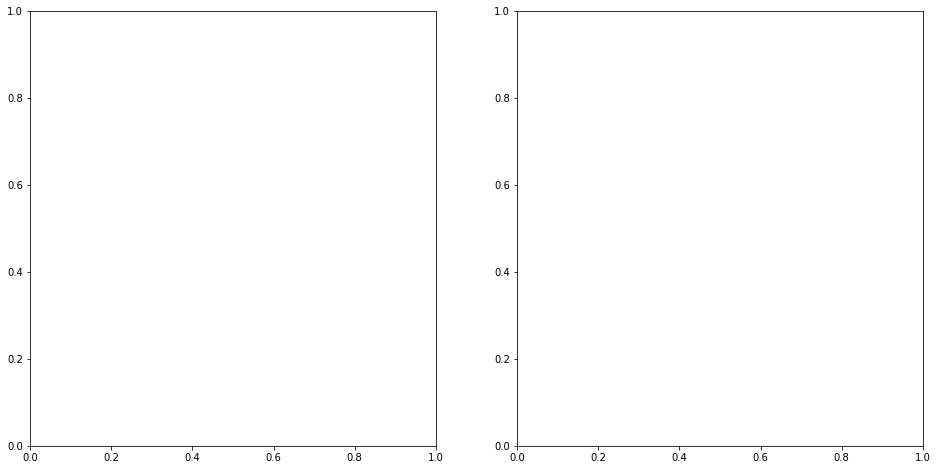

In [50]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16,8)
lines = {'AGB1_400' : '-', 'NSNS1_400' : '--', 'SNE1_400' : '-.' }
labels = {'AGB1_400' : 'III_E46', 'NSNS1_400' : 'III_E49' , 'SNE1_400' : 'III_E51'}


for run in run_names:
    x,y = _get_plot_values('Disk', run, 'mean-median', 'average')
    ax[0].plot(x, y, color = 'black', lw = 3, ls = lines[run], label = labels[run])
    
for run in run_names:
    x,y = _get_plot_values('CNM', run, 'mean-median', 'average')
    ax[1].plot(x, y, color = color_dict['CNM'], lw = 3, ls = lines[run], label = labels[run])

for a in ax:
    a.set_xlim(0,150.0)
    a.set_ylim(0,14)
    a.set_ylabel(r'log(Mean) - log(Median) (dex)')
    a.set_xlabel(r'Time (Myr)')

ax[0].legend(ncol=2)
plt.minorticks_on()
plt.tight_layout()

ax[0].annotate("ISM", xy = (10,1), xycoords = 'data')
ax[1].annotate("CNM", xy = (10,1), xycoords = 'data')


fig.savefig("ISM_CNM_400_average_mean-median.png")

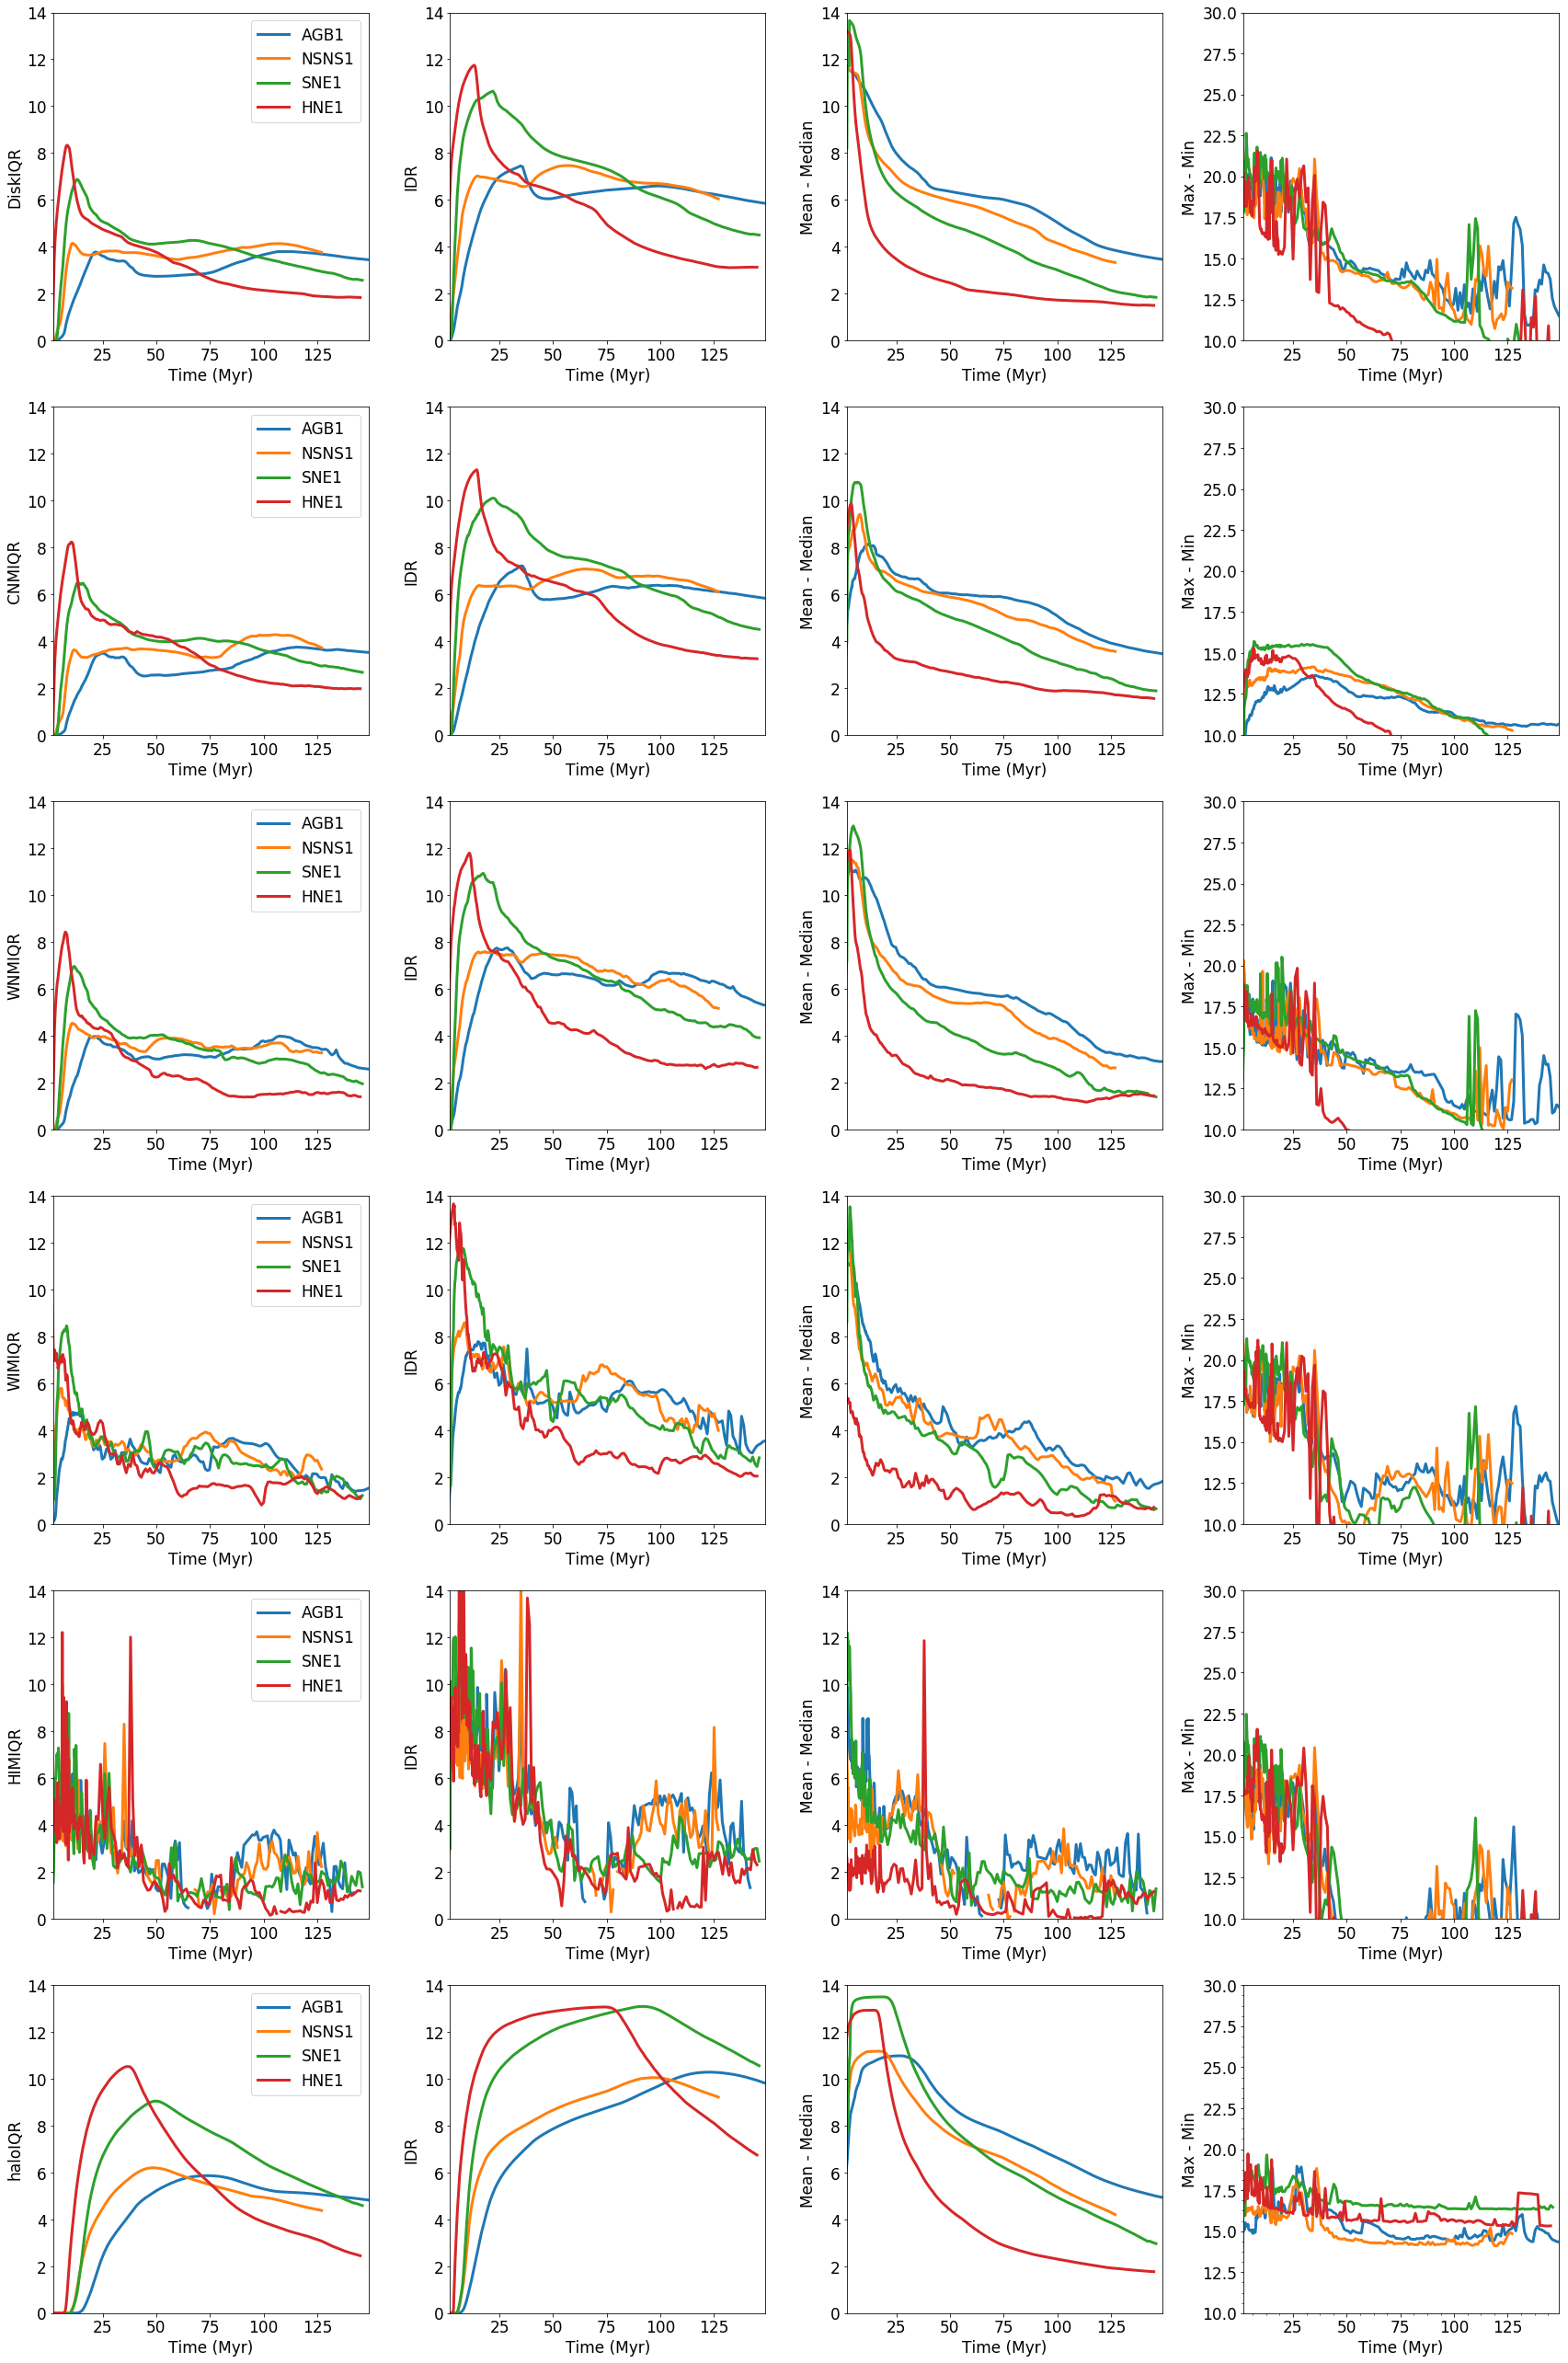

In [14]:
fig, all_ax = plt.subplots(6,4)
fig.set_size_inches(24,36)
phases = ['Disk','CNM','WNM','WIM','HIM','halo']

#
# Note mean reflects ejection fraction and initial mixing mass
#

colors = {'AGB1':'C0','NSNS1':'C1','SNE1':'C2','HNE1':'C3'}

minx = 1000
maxx = -1


for ax,phase in zip(all_ax,phases):
    
    for run in run_names:
        x,y = _get_plot_values(phase, run, 'IQR', 'average')
        ax[0].plot(x, y, color = colors[run], lw = 3, ls = '-', label = run)
        minx = np.min( [minx,np.min(x)])
        maxx = np.max( [maxx,np.max(x)])
    
    for run in run_names:
        x,y = _get_plot_values(phase, run, 'IDR', 'average')
        ax[1].plot(x, y, color = colors[run], lw = 3, ls = '-', label = run)
    
    for run in run_names:
        x,y = _get_plot_values(phase, run, 'mean-median', 'average')
        ax[2].plot(x, y, color = colors[run], lw = 3, ls = '-', label = run)    

    for run in run_names:
        x,y = _get_plot_values(phase, run, 'max-min', 'average')
        ax[3].plot(x, y, color = colors[run], lw = 3, ls = '-', label = run)
    
    for a in ax:
        a.set_xlabel(r'Time (Myr)')
        a.set_xlim(2,maxx)

    ax[0].set_ylabel(phase + 'IQR')
    ax[1].set_ylabel('IDR')
    ax[2].set_ylabel('Mean - Median')
    ax[3].set_ylabel('Max - Min')
    
    ax[0].legend(loc= 'best')        
    
    ax[0].set_ylim(0,14)
    ax[1].set_ylim(0,14)
    ax[2].set_ylim(0,14)
    ax[3].set_ylim(10,30)
    
    
plt.minorticks_on()        
plt.tight_layout()






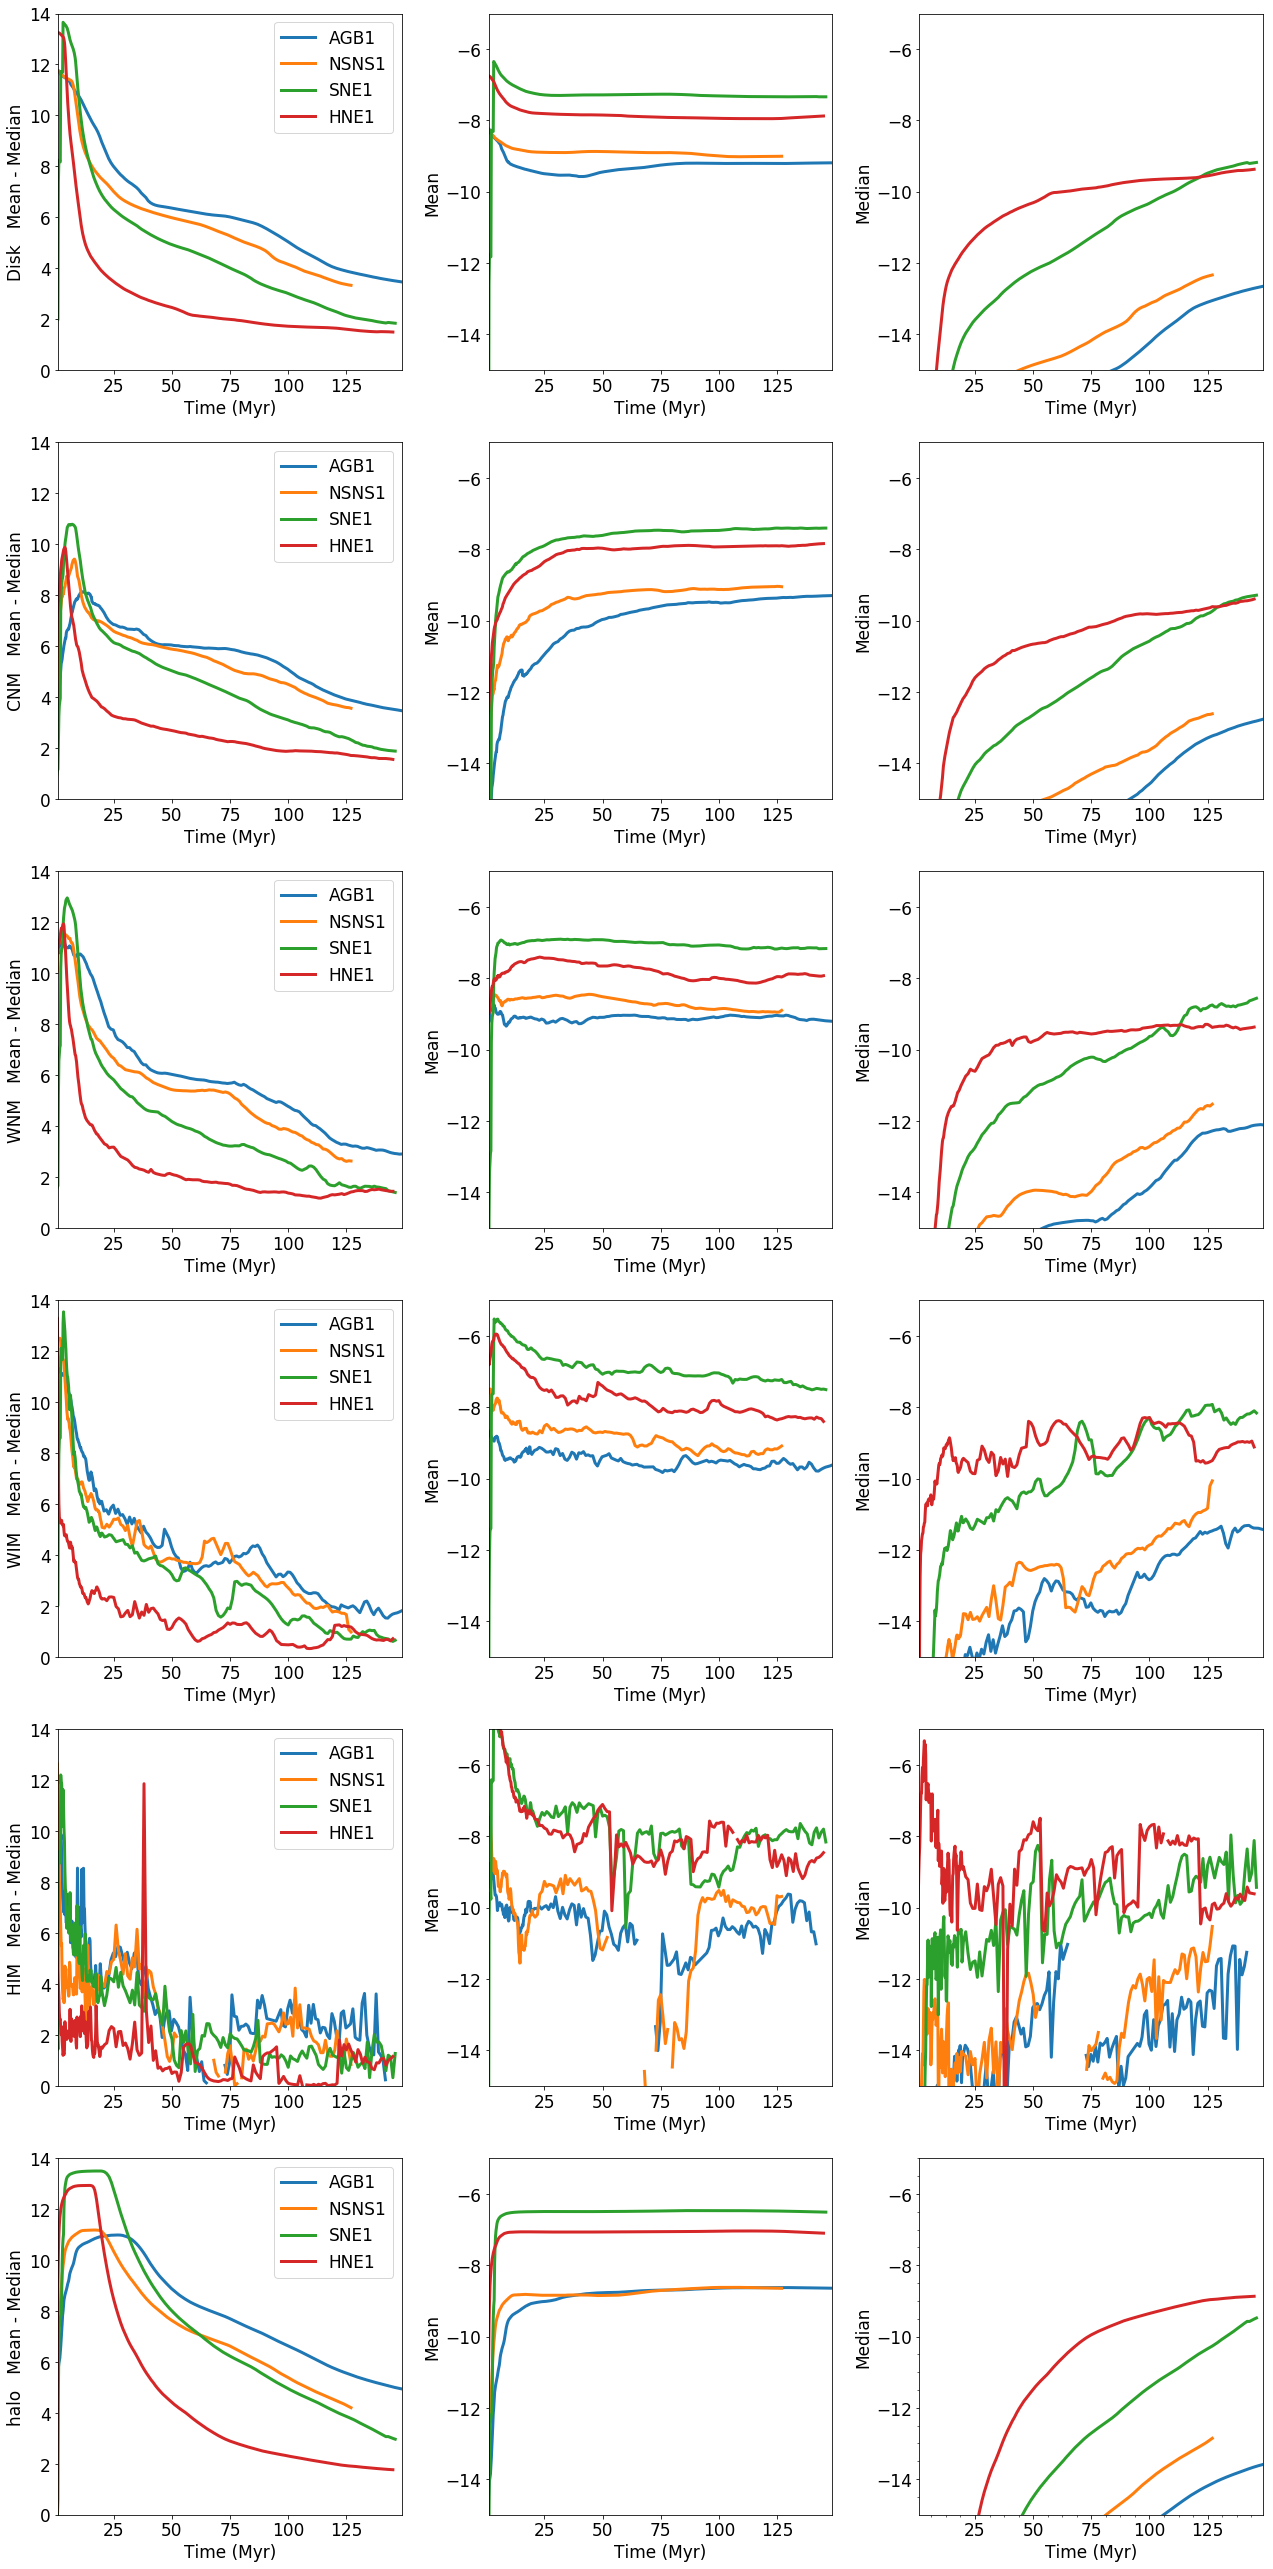

In [12]:
fig, all_ax = plt.subplots(6,3)
fig.set_size_inches(18,36)
phases = ['Disk','CNM','WNM','WIM','HIM','halo']

#
# Note mean reflects ejection fraction and initial mixing mass
#




colors = {'AGB1':'C0','NSNS1':'C1','SNE1':'C2','HNE1':'C3'}

minx = 1000
maxx = -1


for ax,phase in zip(all_ax,phases):
    
    for run in run_names:
        x,y = _get_plot_values(phase, run, 'mean-median', 'average')
        ax[0].plot(x, y, color = colors[run], lw = 3, ls = '-', label = run)
        minx = np.min( [minx,np.min(x)])
        maxx = np.max( [maxx,np.max(x)])
    
    for run in run_names:
        x,y = _get_plot_values(phase, run, 'mean', 'average')
        ax[1].plot(x, y, color = colors[run], lw = 3, ls = '-', label = run)
    
    for run in run_names:
        x,y = _get_plot_values(phase, run, 'median', 'average')
        ax[2].plot(x, y, color = colors[run], lw = 3, ls = '-', label = run)    
    
    for a in ax:
        a.set_xlabel(r'Time (Myr)')
        a.set_xlim(1,maxx)

    ax[0].set_ylabel(phase + '   Mean - Median')
    ax[1].set_ylabel('Mean')
    ax[2].set_ylabel('Median')
    ax[0].legend(loc= 'best')        
    
    ax[0].set_ylim(0,14)
    ax[1].set_ylim(-15,-5)
    ax[2].set_ylim(-15,-5)

plt.minorticks_on()        
plt.tight_layout()






Interpretation so far from the above plots:

1) The mean and median values themselves are affected by the initial mass of the total ejecta, but the difference is NOT. The IQR and IDR are also somewhat sensitive to this in the early evolution (i.e. during the very first enrichment moments) but not afterwards. So looking at the differences should be independent of exactly how much enrichment occurs.

2) The initial very large spikes in IQR and IDR are very sensitive to the very very high metal fractions reaction by these events in the injection sites. They are able to clear out much of the ambient ISM leaving behind a very low density, metal enriched gas. This does not occur in the other events, which have more tame initial spreads.

3) The trends for mean - median vs. IQR and ID are different. This is likely because of the above. The median is less sensitive to the spikes?

4) Mean values in the ISM tend to converge in each phase, indicating that the total amount of metal in a given phase is set only by the total amount ejected from the galaxy and the time it takes for gas to change phases. The evolution of the spreads is driven entirely from changes in the distribution from mixing / homogenization.

5) For mean - median, spreads are rank ordered by inverse injection energy for all but the very initial phase of the evolution. This is again, not true for IQR and IDR. This could maybe becuase of differences in how the metals in each event are strewn about in the initial phases, but not sure. Need to think about this a bit more maybe....

NEW:

Actually it might be that IQR and IDR are bad statistics for this case. Take a case with an initial enrichment of small mass of ISM to some metal fraction Z (delta function or maybe a narrow gaussian at that Z), the PDF will be the sum of the ~delta function at zero abundance and ~delta at Z. But if M_Z <<< M_ISM, then median will be in the middle of the ~zero abundance delta, and IQR and IDR will be very narrow around it. In this case I'd argue that IQR and IDR do a bad job of capturing a measure of homogeneity. But Mean - median still will work. Maybe just look at min - max?



Maybe compute volume fraction of the ISM that contains > X % of the metals in the ISM? where X is like 0.1 or 0.01?

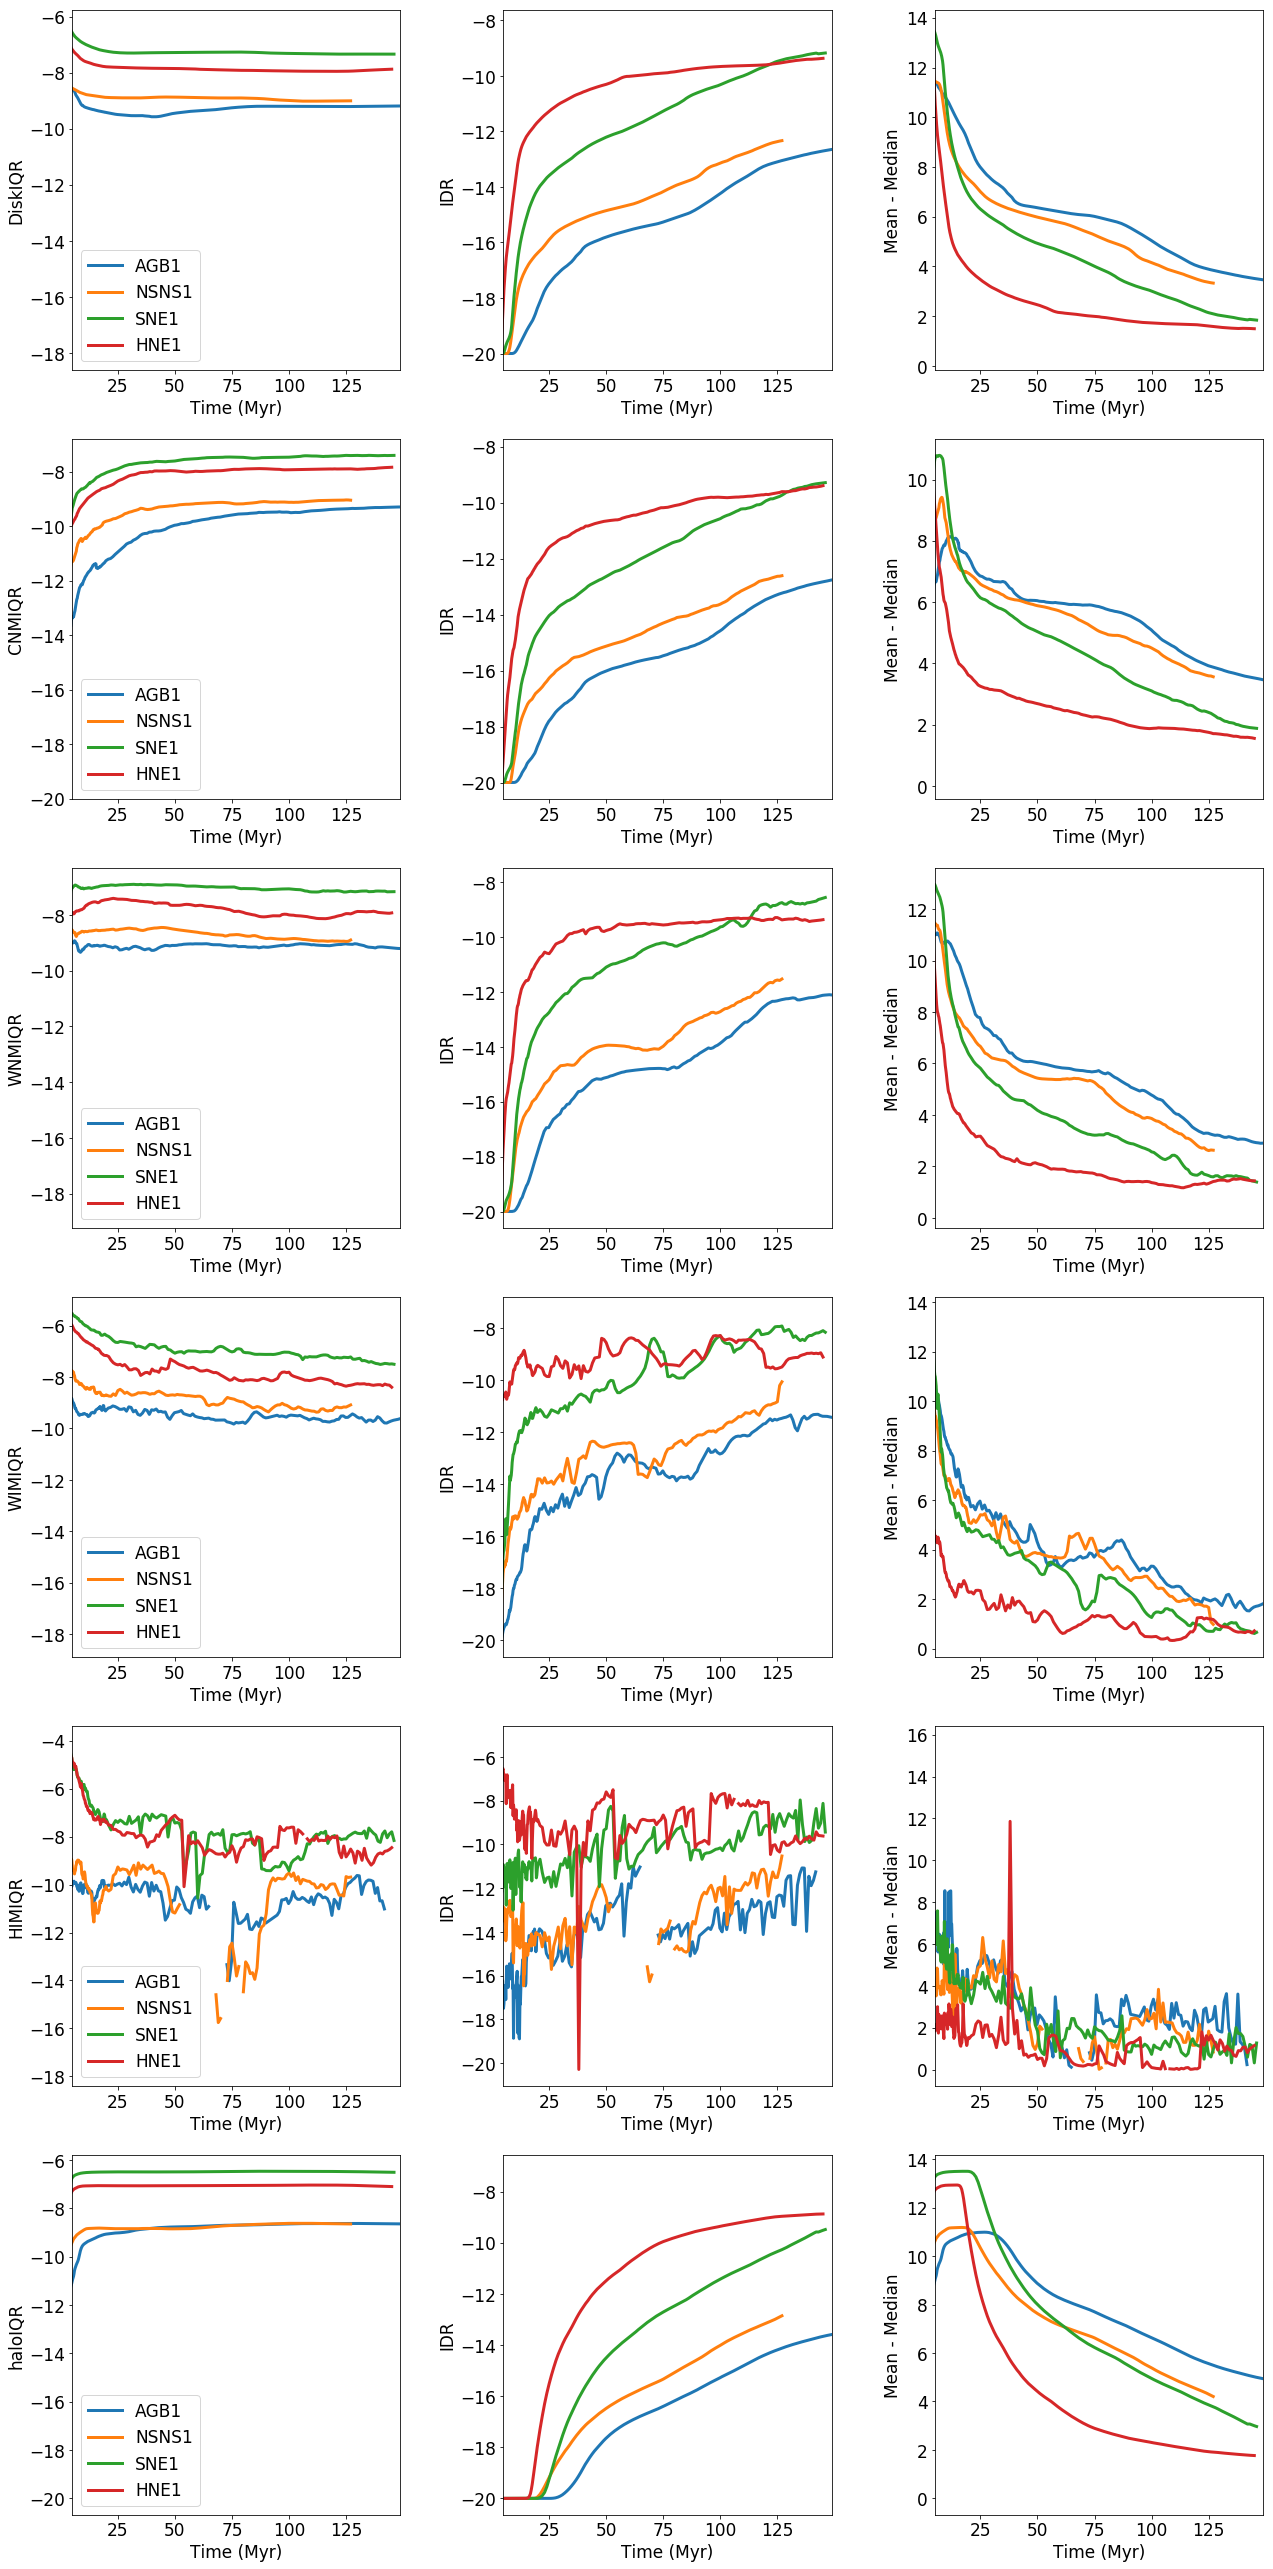

In [11]:
fig, all_ax = plt.subplots(6,3)
fig.set_size_inches(18,36)
phases = ['Disk','CNM','WNM','WIM','HIM','halo']

#
# Note mean reflects ejection fraction and initial mixing mass
#


colors = {'AGB1':'C0','NSNS1':'C1','SNE1':'C2','HNE1':'C3'}

minx = 1000
maxx = -1


for ax,phase in zip(all_ax,phases):
    
    for run in run_names:
        x,y = _get_plot_values(phase, run, 'mean', 'average')
        ax[0].plot(x, y, color = colors[run], lw = 3, ls = '-', label = run)
        minx = np.min( [minx,np.min(x)])
        maxx = np.max( [maxx,np.max(x)])
    
    for run in run_names:
        x,y = _get_plot_values(phase, run, 'median', 'average')
        ax[1].plot(x, y, color = colors[run], lw = 3, ls = '-', label = run)
    
    for run in run_names:
        x,y = _get_plot_values(phase, run, 'mean-median', 'average')
        ax[2].plot(x, y, color = colors[run], lw = 3, ls = '-', label = run)    
    
    for a in ax:
        a.set_xlabel(r'Time (Myr)')
        a.set_xlim(5,maxx)

    ax[0].set_ylabel(phase + 'IQR')
    ax[1].set_ylabel('IDR')
    ax[2].set_ylabel('Mean - Median')
    ax[0].legend(loc= 'best')        
        
plt.tight_layout()






Text(25,0.5,'Stat')

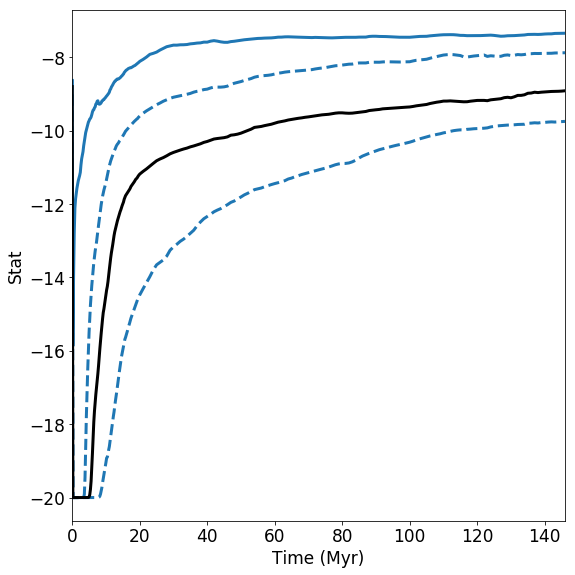

In [71]:
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

ax.plot(mean['time'], Q3['Na'],  lw = 3, color = 'C0', ls = '--', label = 'SNE IQR')
ax.plot(mean['time'], Q1['Na'], lw = 3, color = 'C0', ls = '--', label = 'SNE IQR')
ax.plot(mean['time'], mean['Na'], lw = 3, color = 'C0', ls = '-', label = 'SNE IQR')
ax.plot(mean['time'], median['Na'], lw = 3, color = 'black', ls = '-', label = 'SNE IQR')



#ax.plot(mean_2['time'], Q3_2['average'],  lw = 3, color = 'C2', ls = '--', label = 'HNE IQR')
#ax.plot(mean_2['time'], Q1_2['average'], lw = 3, color = 'C2', ls = '--', label = 'HNE IQR')
#ax.plot(mean_2['time'], mean_2['average'], lw = 3, color = 'C2', ls = '-', label = 'HNE IQR')


ax.set_xlim(mean['time'][0], mean['time'][-1])

plt.tight_layout()

ax.set_xlabel(r'Time (Myr)')
ax.set_ylabel(r'Stat')
